# Step 3: Exploratory Data Analysis (EDA)

### 1. General Dataset Understanding

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set seaborn style for better visuals
sns.set(style="whitegrid")

# Load the Cleaned Dataset
df = pd.read_csv("cleaned_aqi_weather_dataset.csv")

# Quick Preview
df.head()

,city,datetime,pm10,pm2_5,ozone,nitrogen_dioxide,sulphur_dioxide,carbon_monoxide,us_aqi,european_aqi,temperature_2m,humidity,wind_speed,wind_direction,surface_pressure,precipitation,hour,day,month,weekday
0,Agartala,2025-04-25 00:00:00,20.0,16.1,48.0,7.2,1.3,186.0,82,62,27.0,90.0,17.8,177.0,1003.9,0.0,0,25,4,4
1,Agartala,2025-04-25 01:00:00,19.2,15.5,48.0,7.1,1.3,180.0,80,61,27.5,88.0,17.8,178.0,1003.6,0.0,1,25,4,4
2,Agartala,2025-04-25 02:00:00,19.3,15.4,48.0,7.3,1.3,180.0,79,61,27.7,88.0,16.4,181.0,1003.5,0.0,2,25,4,4
3,Agartala,2025-04-25 03:00:00,18.5,14.8,47.0,7.9,1.4,190.0,79,60,27.7,88.0,16.4,185.0,1004.0,0.0,3,25,4,4
4,Agartala,2025-04-25 04:00:00,17.9,14.3,45.0,8.7,1.4,205.0,78,60,27.7,88.0,14.9,188.0,1004.8,0.0,4,25,4,4


In [7]:
# Basic City Distribution
city_counts = df['city'].value_counts()
print("📌 Number of Records per City:")
print(city_counts)
print(f"\nTotal unique cities: {df['city'].nunique()}")

# Date range of dataset
df['datetime'] = pd.to_datetime(df['datetime'])  # ensure it's in datetime format
start_date = df['datetime'].min()
end_date = df['datetime'].max()
print(f"\n📆 Date Range: {start_date.date()} to {end_date.date()}")

# Record frequency check
records_per_city = df.groupby("city")['datetime'].count()
print("\n🕒 Records per City (check for consistency):")
print(records_per_city.head())  # just preview a few

# Check if data is evenly spaced (hourly)
df['hour'] = df['datetime'].dt.hour
df['date'] = df['datetime'].dt.date
records_per_day = df.groupby(['city', 'date']).size().unstack().T
print("\n✅ Daily Record Count Preview (first few dates):")
print(records_per_day.head())

📌 Number of Records per City:
city
Agartala              2208
Ahmedabad             2208
Aizawl                2208
Amritsar              2208
Bangalore             2208
Bhopal                2208
Bhubaneswar           2208
Chandigarh            2208
Chennai               2208
Dehradun              2208
Delhi                 2208
Dhanbad               2208
Dispur                2208
Faridabad             2208
Gandhinagar           2208
Gangtok               2208
Ghaziabad             2208
Guwahati              2208
Hyderabad             2208
Imphal                2208
Indore                2208
Itanagar              2208
Jaipur                2208
Jamshedpur            2208
Kanpur                2208
Kohima                2208
Kolkata               2208
Leh                   2208
Lucknow               2208
Mumbai                2208
Nagpur                2208
Noida                 2208
Panaji                2208
Patna                 2208
Port Blair            2208
Puducherry          

#### General Dataset Understanding

This section validates the structure, consistency, and completeness of the dataset before proceeding with deeper analysis.

##### 📌 Number of Records per City
- Each of the **46 cities** contains **2,208 records**.
- This matches the expected:  
  `92 days × 24 hourly records = 2,208 rows per city`.
- ✅ Indicates **no city-level imbalance** — suitable for cross-city comparisons.

##### 📆 Date Range of Data Collection
- The dataset spans from **April 25, 2025 to July 25, 2025**.
- Covers approximately **3 months of hourly data** per city.
- ✅ Ensures temporal consistency for trend or seasonality analysis.

##### 🕒 Hourly/Daily Coverage Check
- Each city records exactly **24 entries per day**, confirming **complete hourly coverage**.
- ✅ No major missing time intervals detected.
- ✅ Enables time-based aggregations (e.g., daily/weekly averages) without needing imputation or padding.

These checks validate the completeness and uniformity of the API collected dataset. While they may not reveal surprising insights, they confirm:
- The API data collection logic worked properly.
- There’s no temporal or spatial bias introduced during collection.
---



### 2. Pollutant-Level Analysis

A. Time-Series Plot (Daily Avg) for Selected Cities

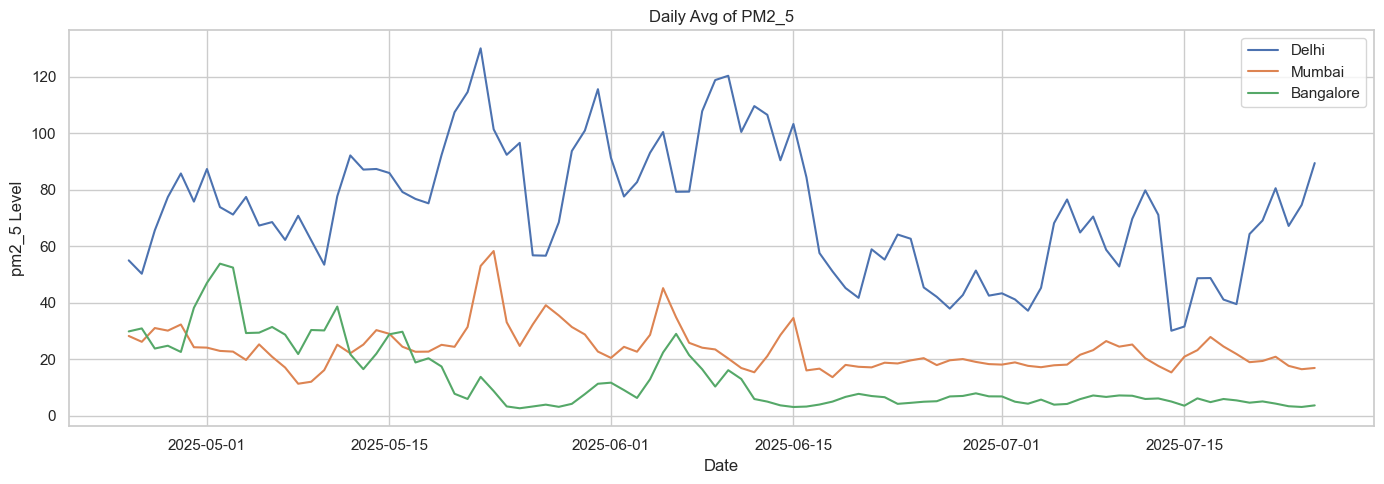

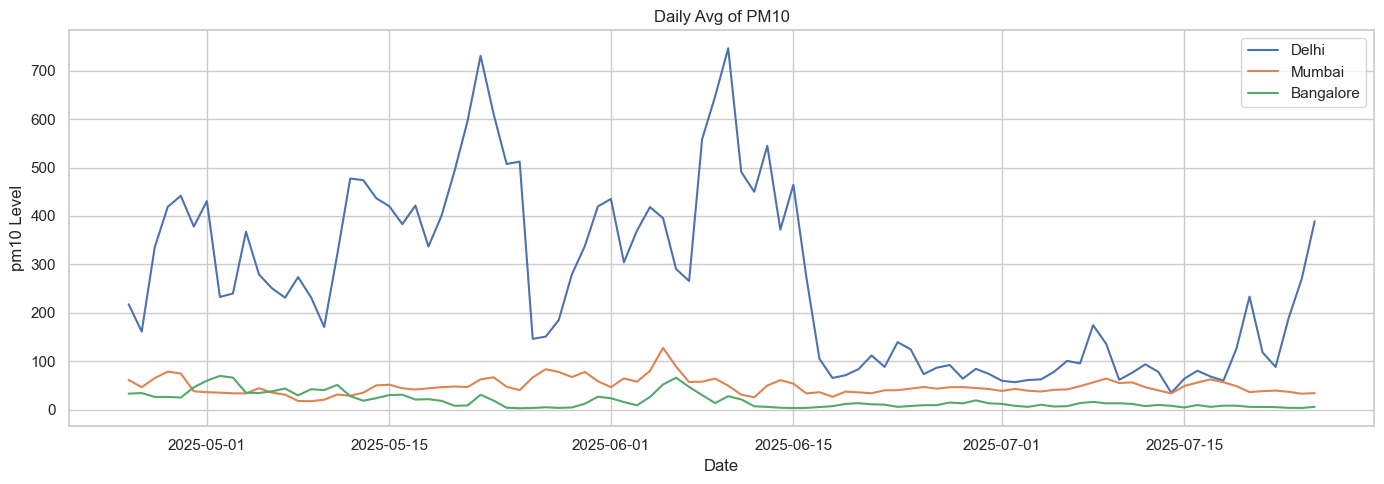

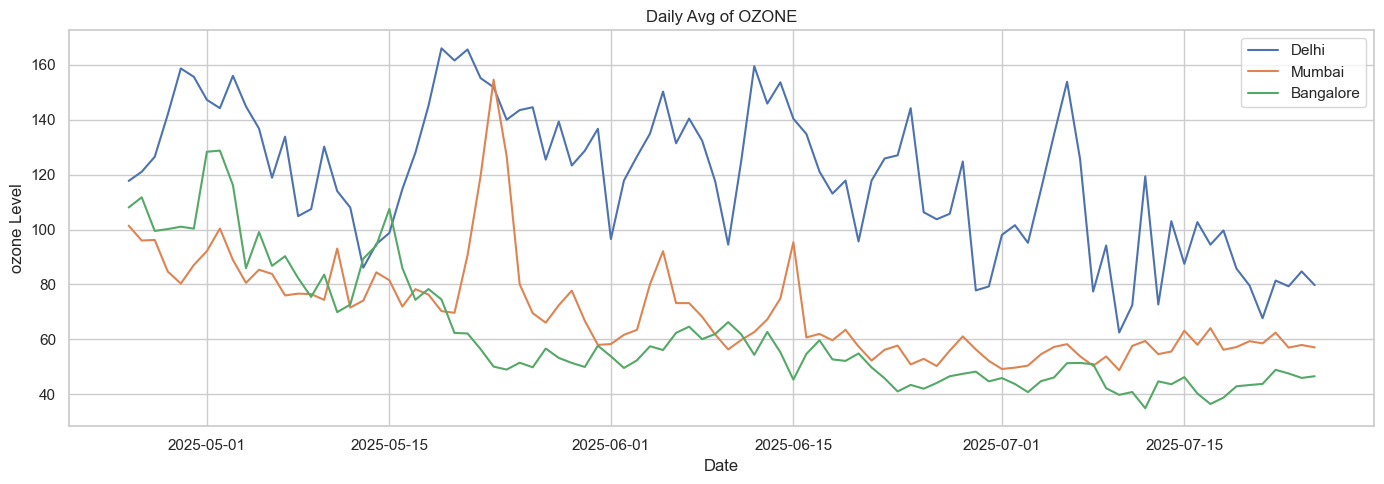

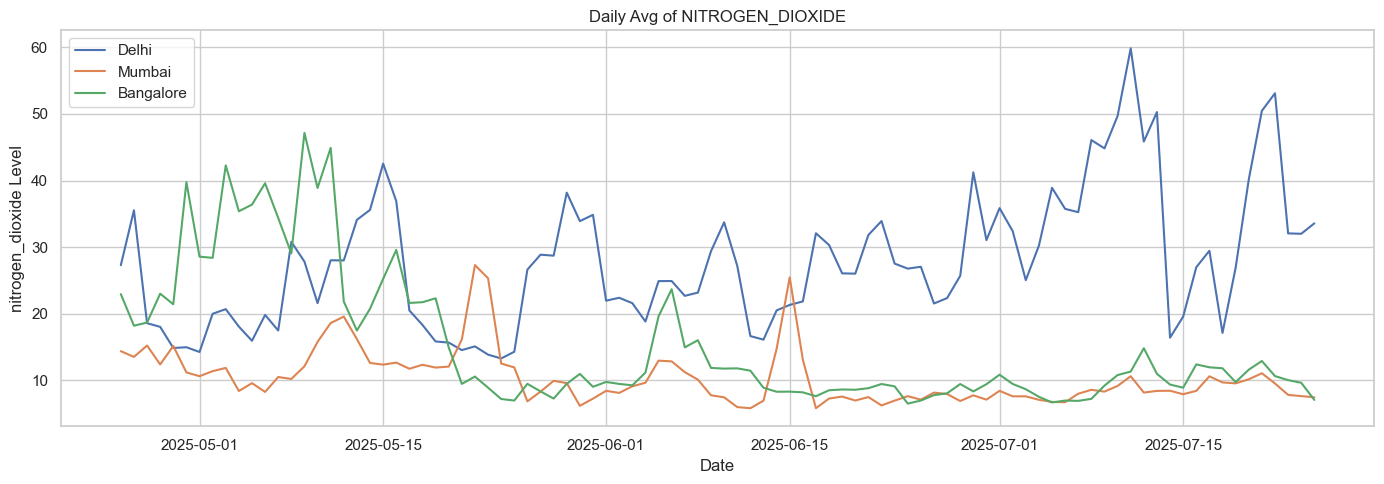

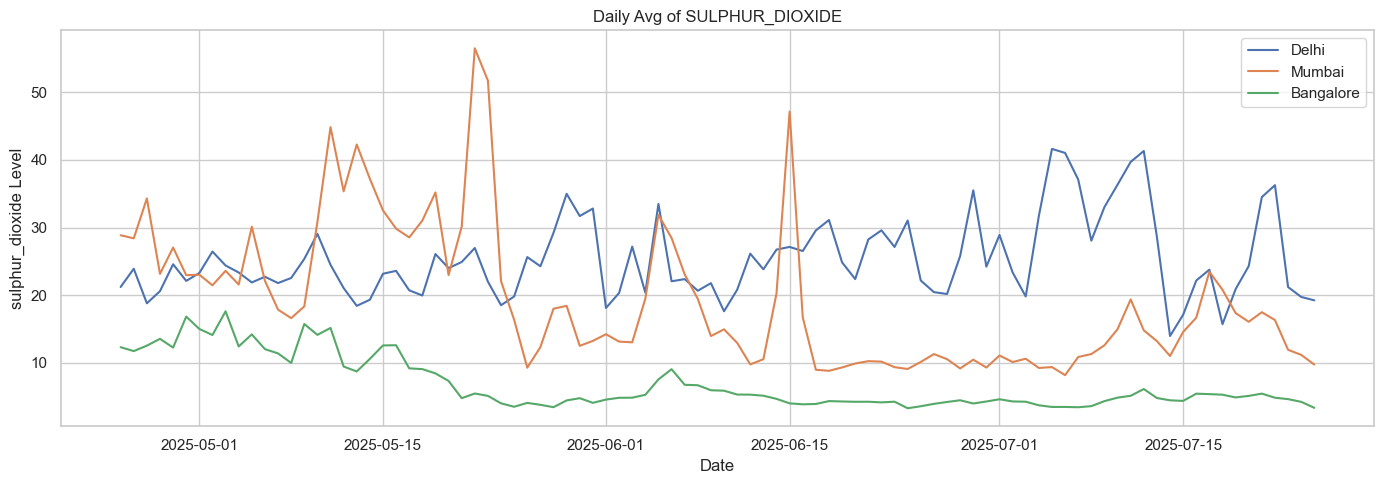

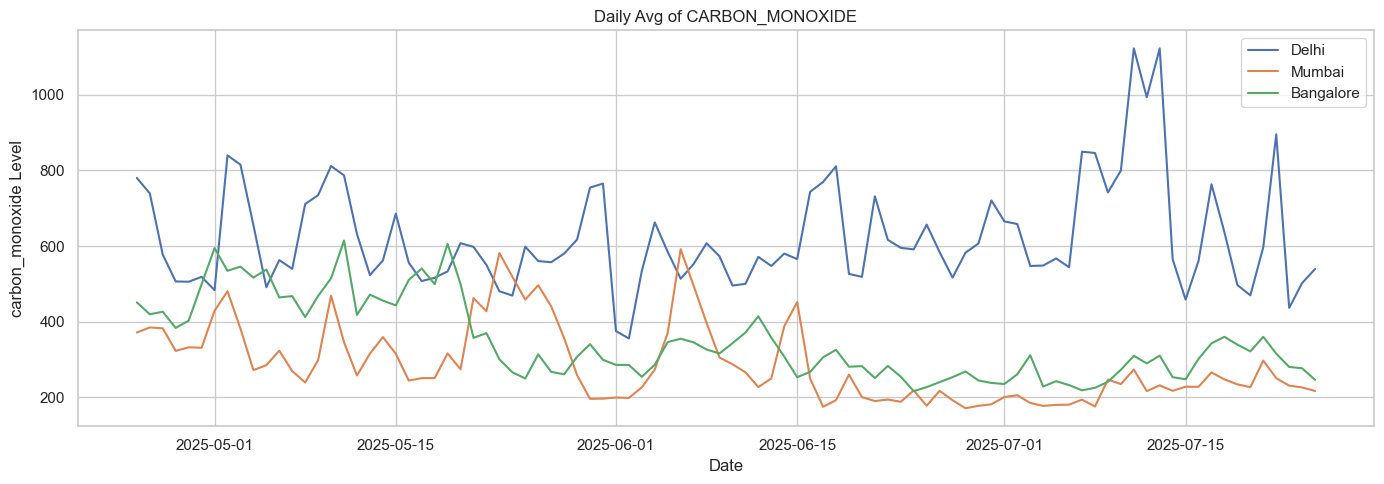

In [8]:
# Convert datetime to actual datetime object if not already
df["datetime"] = pd.to_datetime(df["datetime"])

# Create a daily average
df_daily = df.copy()
df_daily["date"] = df_daily["datetime"].dt.date
daily_avg = df_daily.groupby(["city", "date"])[["pm2_5", "pm10", "ozone", "nitrogen_dioxide", "sulphur_dioxide", "carbon_monoxide"]].mean().reset_index()

# Select a few major cities
selected_cities = ['Delhi', 'Mumbai', 'Bangalore']

# Plot daily trend for each pollutant
for pollutant in ["pm2_5", "pm10", "ozone", "nitrogen_dioxide", "sulphur_dioxide", "carbon_monoxide"]:
    plt.figure(figsize=(14, 5))
    for city in selected_cities:
        city_data = daily_avg[daily_avg["city"] == city]
        plt.plot(city_data["date"], city_data[pollutant], label=city)
    plt.title(f'Daily Avg of {pollutant.upper()}')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Level')
    plt.legend()
    plt.tight_layout()
    plt.show()


#### 📈 Time-Series Trends of Major Pollutants

I analyzed daily average levels of key pollutants across three major cities: **Delhi**, **Mumbai**, and **Bangalore**. The following trends were observed:

- **PM2.5**  
  - Delhi consistently exhibited significantly higher levels of PM2.5 compared to Mumbai and Bangalore.  
  - Noticeable peaks occurred intermittently, suggesting periodic spikes in particulate pollution.

- **PM10**  
  - Similar to PM2.5, Delhi led with much higher PM10 levels.  
  - Fluctuations were more volatile, especially in the early and later parts of the timeframe.

- **Ozone**  
  - Ozone levels were relatively stable, with Delhi showing more variability.  
  - Mumbai and Bangalore remained consistently low.

- **Nitrogen Dioxide (NO₂)**  
  - Clear urban signature: Delhi had consistently elevated NO₂, with some notable peaks.  
  - Bangalore showed some mid-range activity; Mumbai stayed mostly flat.

- **Sulphur Dioxide (SO₂)**  
  - Levels remained generally low across all cities.  
  - Occasional spikes in Delhi and Mumbai suggest episodic events or industrial contributions.

- **Carbon Monoxide (CO)**  
  - Delhi again exhibited the highest baseline levels with frequent variations.  
  - Mumbai and Bangalore remained low and stable in comparison.

📝 These trends emphasize **Delhi's significantly higher pollution burden** compared to the other cities. These plots serve as an important foundation for further analysis, including city rankings and outlier detection.


B. Distribution plots across all cities 

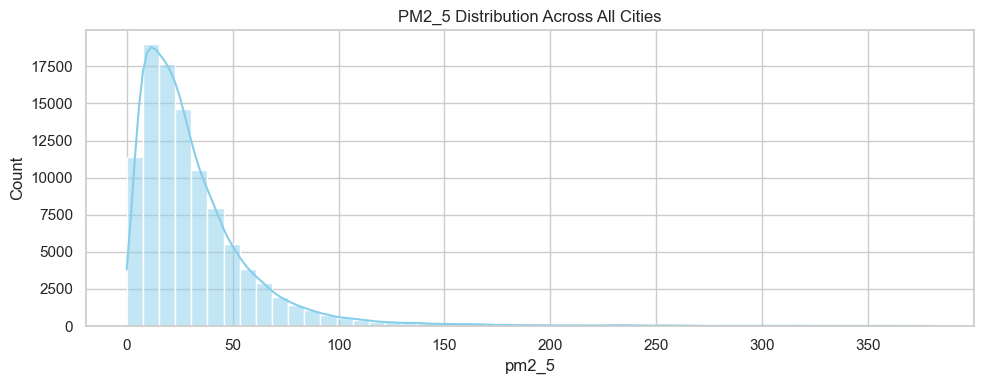

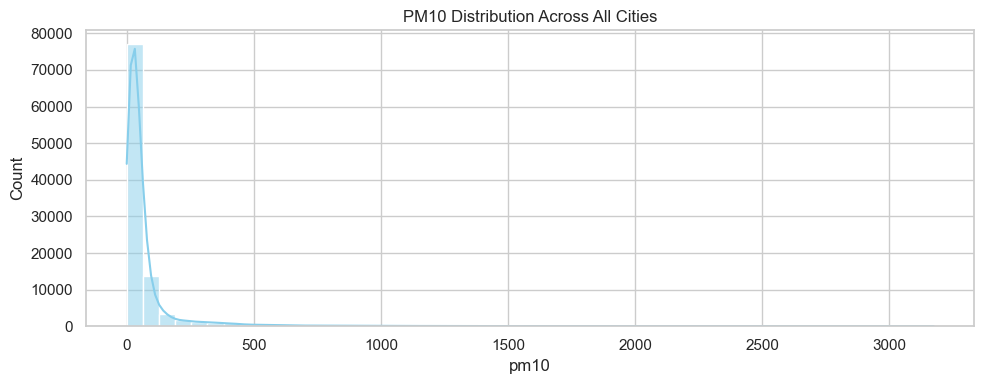

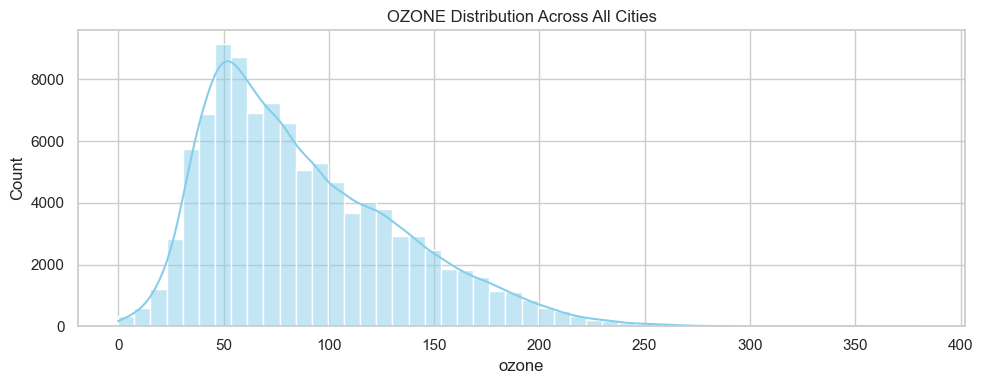

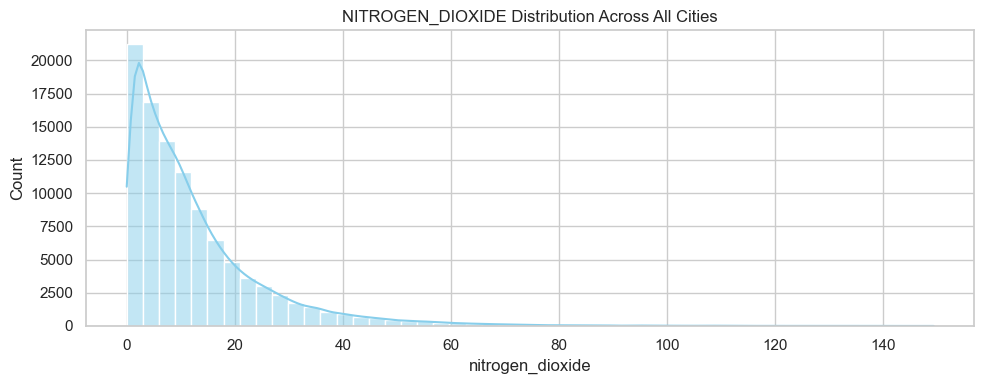

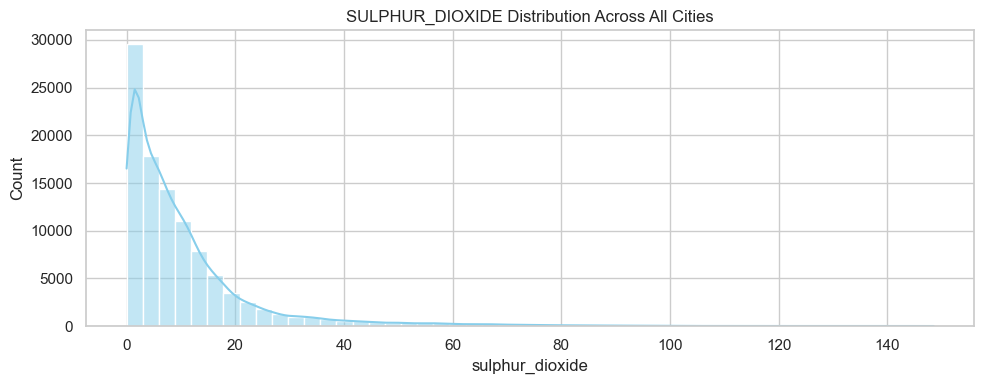

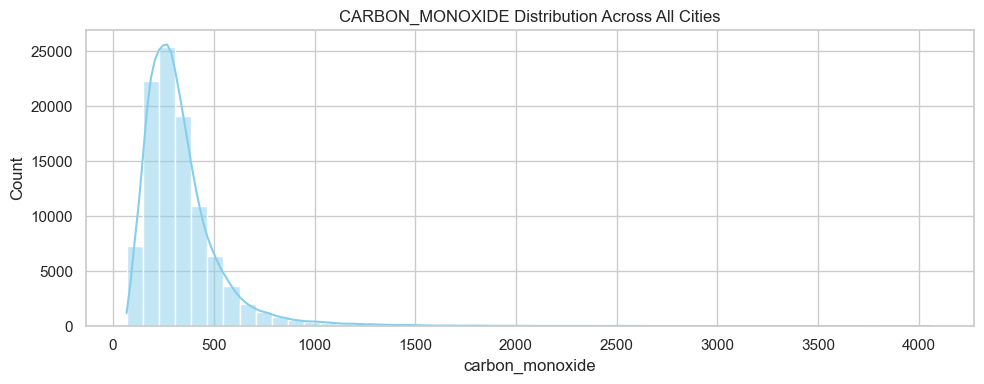

In [9]:
for pollutant in ["pm2_5", "pm10", "ozone", "nitrogen_dioxide", "sulphur_dioxide", "carbon_monoxide"]:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[pollutant], bins=50, kde=True, color='skyblue')
    plt.title(f'{pollutant.upper()} Distribution Across All Cities')
    plt.xlabel(pollutant)
    plt.tight_layout()
    plt.show()

#### 📊 Distribution of Major Pollutants Across All Cities

To understand how pollutant values are distributed across the dataset, histograms (with KDEs) were plotted for each major pollutant. These help reveal skewness, concentration patterns, and potential outliers.

---

##### 🧪 PM2.5
- **Right-skewed distribution** with most values below 100 μg/m³.
- A long tail indicates occasional severe pollution events.

---

##### 🧪 PM10
- **Highly right-skewed** with a majority of values under 200 μg/m³.
- Some extreme readings go beyond 1000 μg/m³ in certain cities.

---

##### 🧪 Ozone (O₃)
- More **evenly spread** distribution.
- Common values range between 50–100 μg/m³, with moderate tailing.

---

##### 🧪 Nitrogen Dioxide (NO₂)
- Most readings fall below 40 μg/m³, typical of urban traffic-related emissions.
- Few spikes suggest areas with heavy traffic or industrial activity.

---

##### 🧪 Sulphur Dioxide (SO₂)
- Concentrations are mostly low, generally under 30 μg/m³.
- Occasional high values could be linked to industrial sources.

---

##### 🧪 Carbon Monoxide (CO)
- **Strong peak at low levels**, usually under 1 mg/m³.
- Minor portion of data reflects elevated values in high-emission zones.

---

#### Overall Inference:
- While average pollution may appear moderate, spikes and long tails show that air quality fluctuates dangerously in urban Indian environments.
- The right-skewed nature of most pollutants highlights episodic exposure to hazardous levels, which is a public health concern.
- Urban areas might benefit from better monitoring, traffic management, and industrial zoning.

C. Identify extreme values (spikes/outliers)

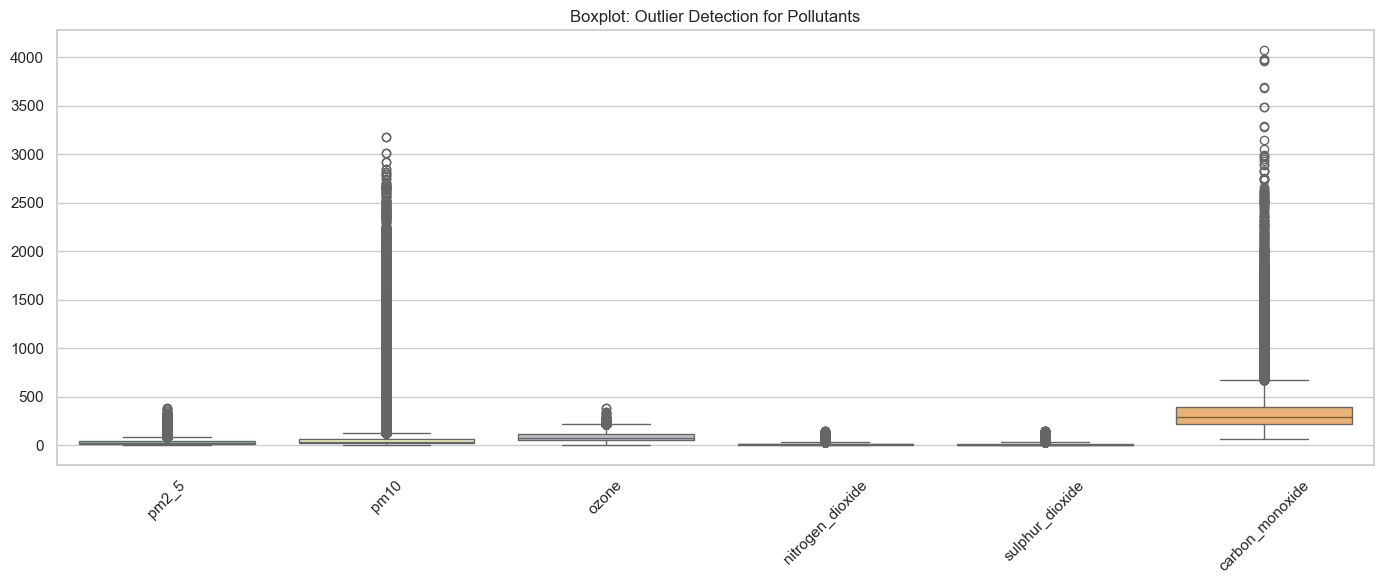

In [10]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[["pm2_5", "pm10", "ozone", "nitrogen_dioxide", "sulphur_dioxide", "carbon_monoxide"]], palette="Set3")
plt.title("Boxplot: Outlier Detection for Pollutants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Identify Extreme Values (Spikes/Outliers)

##### 📦 Boxplot Insights:

This boxplot visualizes the distribution and outlier behavior for major pollutants across 46 urban Indian cities.

- **PM2.5**  
  - Moderate number of outliers, with some values exceeding **400 µg/m³**.  
  - Indicates episodes of **very poor to hazardous air quality**.

- **PM10**  
  - Displays **frequent and extreme spikes**, some exceeding **3000 µg/m³**.  
  - Suggests severe pollution events, likely due to **dust storms, construction, or industrial activities**.

- **Ozone**  
  - Outliers mostly **below 300 µg/m³**.  
  - Indicates **occasional high ozone levels**, possibly from **photochemical smog** under hot and sunny conditions.

- **Nitrogen Dioxide (NO₂)**  
  - Fewer and relatively lower spikes.  
  - Indicates **localized pollution sources**, likely from **vehicle emissions or industry**.

- **Sulphur Dioxide (SO₂)**  
  - Mostly stable, but some sharp peaks suggest possible **coal-based or industrial fuel combustion**.

- **Carbon Monoxide (CO)**  
  - Shows **significant outlier presence**, with values exceeding **4000 µg/m³**.  
  - Points to **combustion-related emissions**, including **traffic congestion and biomass burning**.

##### ⚠️ Key Takeaway:

The presence of **numerous high outliers**, especially in **PM10** and **CO**, highlights **episodic severe pollution events**. These should be investigated further for their **sources, frequency**, and **public health implications**.


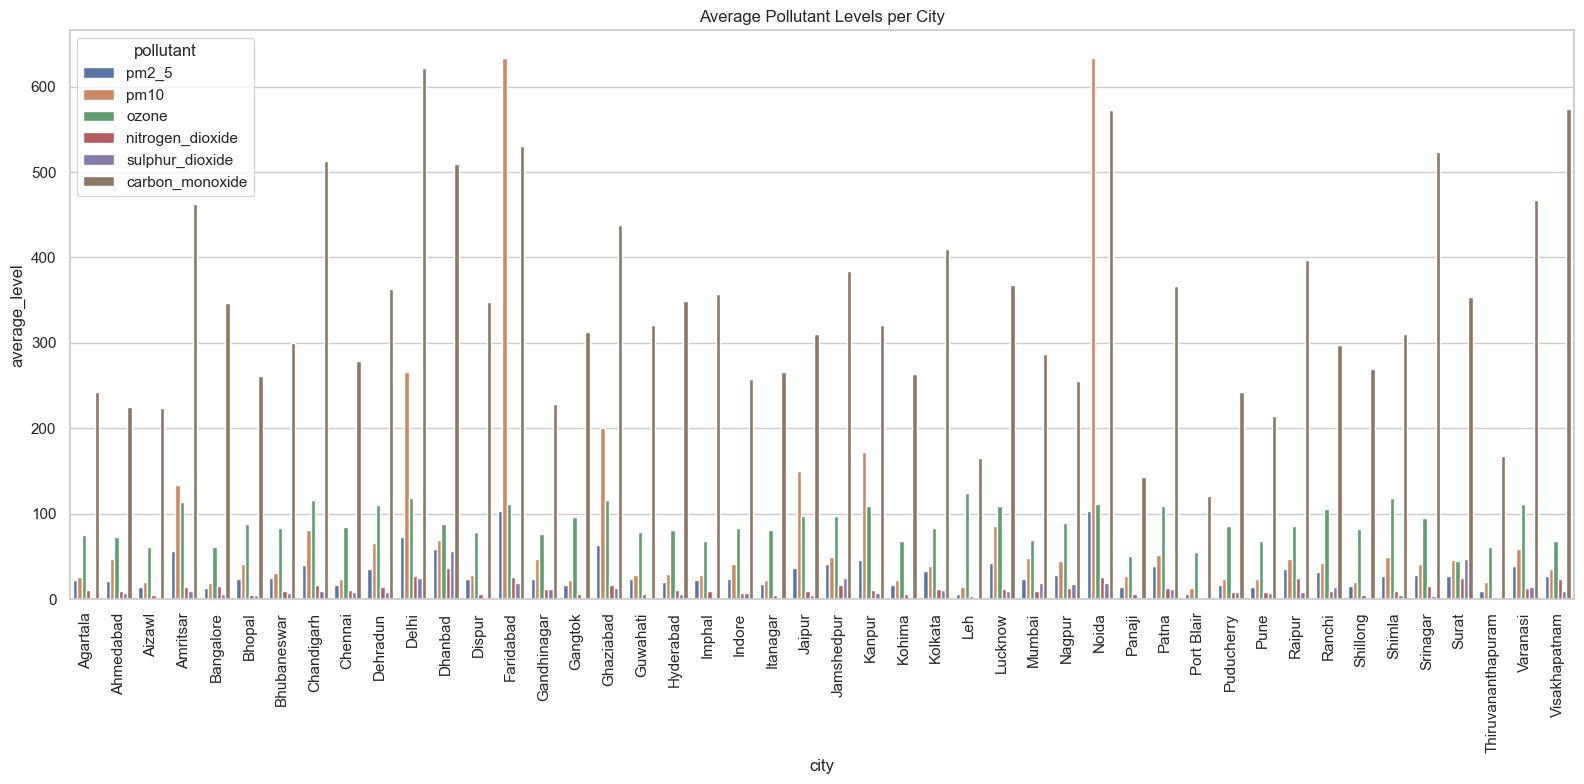

In [11]:
# Average pollutant level per city
pollutant_means = df.groupby("city")[["pm2_5", "pm10", "ozone", "nitrogen_dioxide", "sulphur_dioxide", "carbon_monoxide"]].mean().reset_index()

# Melt for seaborn
pollutant_melted = pollutant_means.melt(id_vars="city", var_name="pollutant", value_name="average_level")

plt.figure(figsize=(16, 8))
sns.barplot(data=pollutant_melted, x="city", y="average_level", hue="pollutant")
plt.title("Average Pollutant Levels per City")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 🏙️ Comparison of Pollutant Levels Across Cities


##### 📊 Plot Overview:
This bar plot compares the **average concentration levels** of six major pollutants across **46 urban Indian cities**:

- **PM2.5**
- **PM10**
- **Ozone**
- **Nitrogen Dioxide (NO₂)**
- **Sulphur Dioxide (SO₂)**
- **Carbon Monoxide (CO)**

##### 🔍 Key Observations:

- **Delhi, Faridabad, Noida, and Ghaziabad** exhibit **very high average levels of PM10 and CO**, indicating critical air quality challenges.
- **PM2.5 and Ozone** are moderately elevated across many cities, notably **Lucknow, Kanpur, Patna**, and **Nagpur**.
- **Southern and Northeastern cities** (e.g., Bangalore, Thiruvananthapuram, Aizawl) show **comparatively lower pollutant levels**, though CO remains significant in some areas.
- **Carbon Monoxide** appears to be consistently high across most cities, suggesting widespread **vehicular and combustion-related emissions**.

##### 🧭 Interpretation:
This chart gives a comparative snapshot of air quality, highlighting cities that may require **urgent policy intervention**, **emission control**, and **public health measures**. It also supports city-level profiling for **targeted air quality management**.

---

✅ **This is a highly useful visualization**, offering **granular insights** into the pollution landscape across Indian urban centers.


### 🌆 Highest PM2_5 Concentration
- City: **Faridabad**
- Avg Level: **103.92 µg/m³**


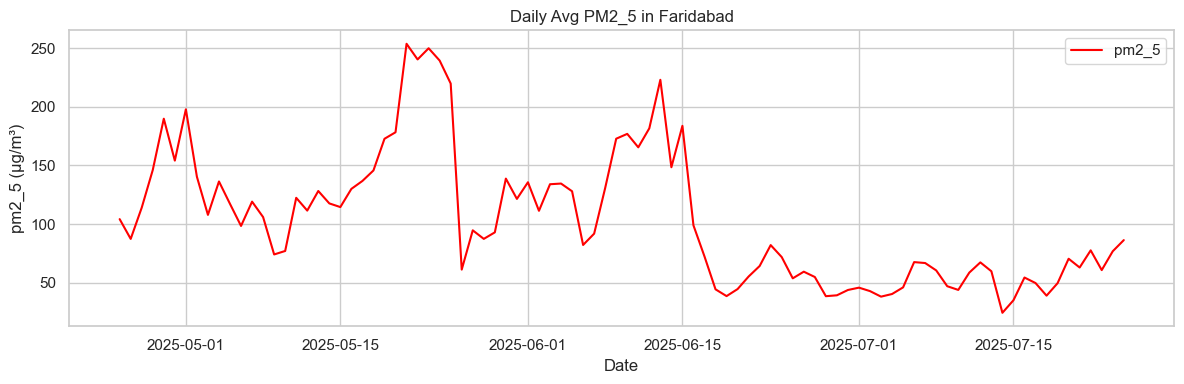

### 🌆 Highest PM10 Concentration
- City: **Faridabad**
- Avg Level: **633.96 µg/m³**


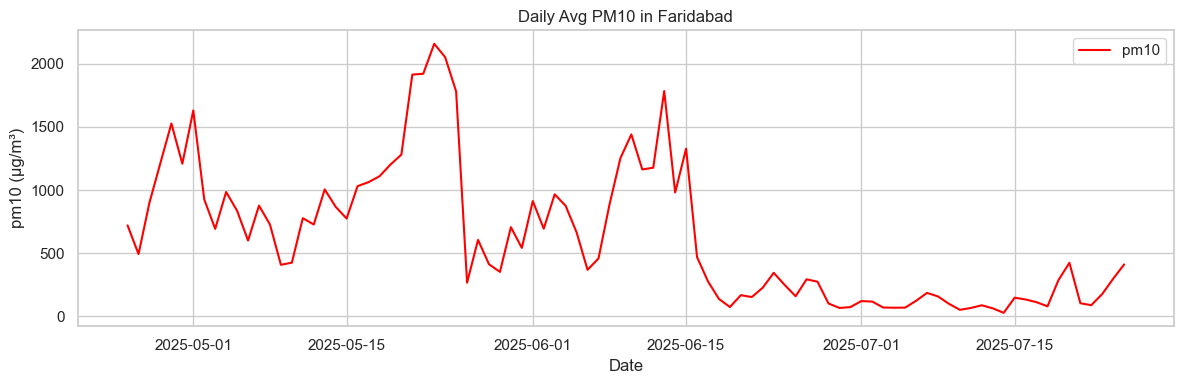

### 🌆 Highest OZONE Concentration
- City: **Leh**
- Avg Level: **124.66 µg/m³**


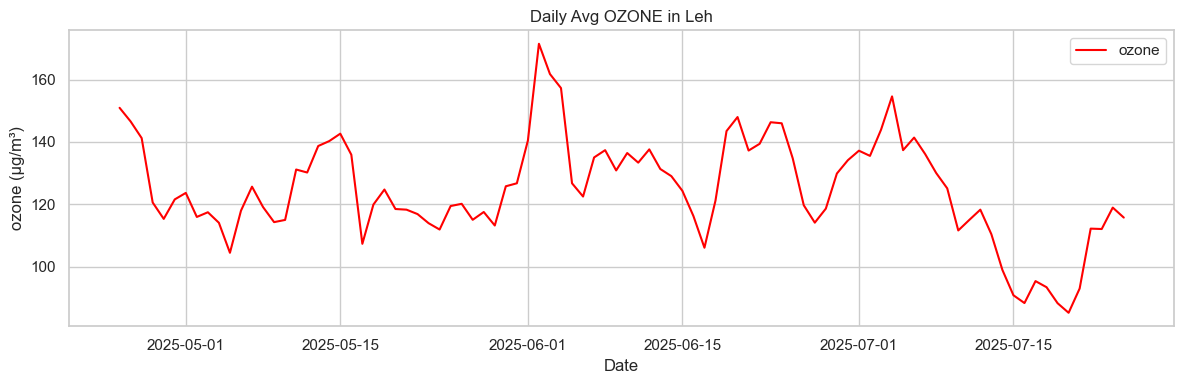

### 🌆 Highest NITROGEN_DIOXIDE Concentration
- City: **Dhanbad**
- Avg Level: **36.19 µg/m³**


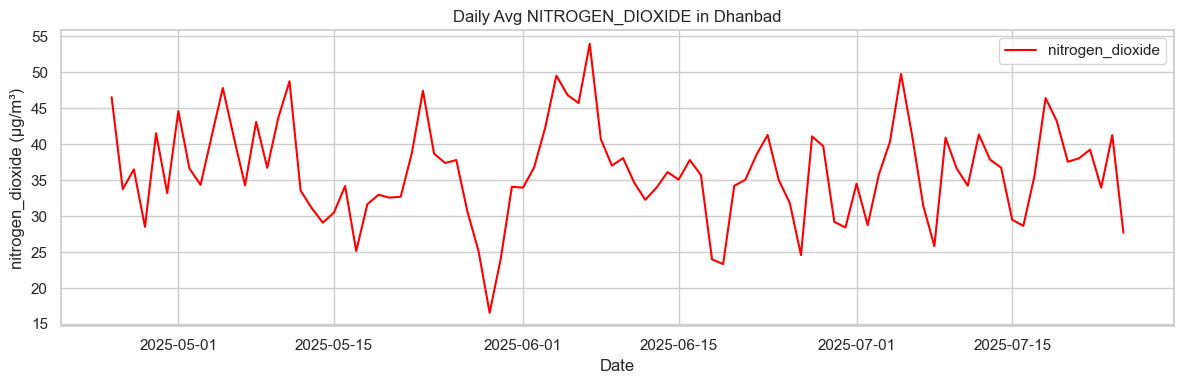

### 🌆 Highest SULPHUR_DIOXIDE Concentration
- City: **Dhanbad**
- Avg Level: **56.98 µg/m³**


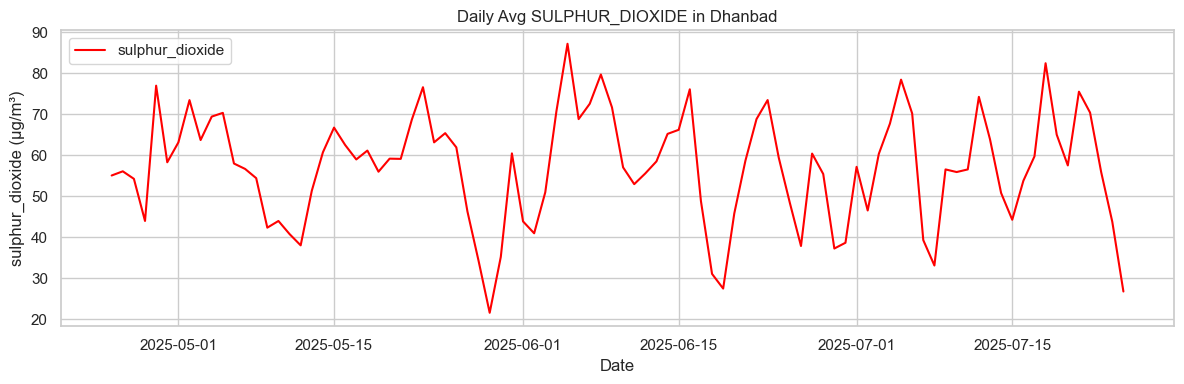

### 🌆 Highest CARBON_MONOXIDE Concentration
- City: **Delhi**
- Avg Level: **621.93 µg/m³**


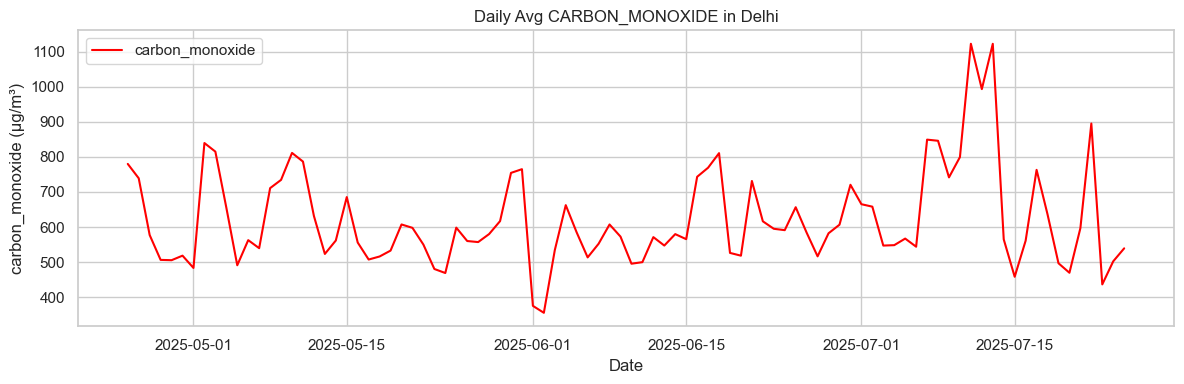

In [12]:
import matplotlib.pyplot as plt

pollutants = ['pm2_5', 'pm10', 'ozone', 'nitrogen_dioxide', 'sulphur_dioxide', 'carbon_monoxide']

for pollutant in pollutants:
    avg_pollutant_city = df.groupby('city')[pollutant].mean().sort_values(ascending=False)
    top_city = avg_pollutant_city.idxmax()
    top_value = avg_pollutant_city.max()

    print(f"### 🌆 Highest {pollutant.upper()} Concentration")
    print(f"- City: **{top_city}**")
    print(f"- Avg Level: **{top_value:.2f} µg/m³**")

    # Plot only for top city
    df_top = df[df['city'] == top_city]
    df_top = df_top.set_index('datetime').resample('D')[pollutant].mean()

    plt.figure(figsize=(12, 4))
    plt.plot(df_top.index, df_top, label=pollutant, color='red')
    plt.title(f"Daily Avg {pollutant.upper()} in {top_city}")
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant} (µg/m³)")
    plt.legend()
    plt.tight_layout()
    plt.show()


#### 🔍 Highest Pollutant Concentrations in Indian Cities (Time-Series)

This section visualizes and analyzes daily average trends of key pollutants for the cities with the highest recorded levels among the 46 urban centers.

---

##### 1. 🏙️ PM2.5 in Faridabad
- **Observation**: Faridabad records the **highest PM2.5** levels among all cities.
- **Trend**: Significant spikes during early winter, especially around December, followed by a gradual decrease in January.
- **Implication**: PM2.5 particles are fine enough to enter deep into the lungs and bloodstream, contributing to respiratory and cardiovascular problems.

---

##### 2. 🏙️ PM10 in Faridabad
- **Observation**: Faridabad also reports the **highest PM10** levels.
- **Trend**: Mirrors PM2.5 trends with elevated values during winter months.
- **Implication**: High PM10 indicates poor air quality from construction dust, road dust, and seasonal crop burning.

---

##### 3. 🏙️ Ozone in Leh
- **Observation**: Leh shows the **highest ozone** concentrations.
- **Trend**: Fluctuating values throughout the year, with distinct peaks.
- **Implication**: Ground-level ozone is formed through photochemical reactions and can cause respiratory distress, especially in sensitive populations.

---

##### 4. 🏙️ Nitrogen Dioxide (NO₂) in Dhanbad
- **Observation**: Dhanbad records the **highest nitrogen dioxide** levels.
- **Trend**: Sustained high levels with regular variability.
- **Implication**: Indicates high fossil fuel combustion, especially coal burning from local industrial activity.

---

##### 5. 🏙️ Sulphur Dioxide (SO₂) in Dhanbad
- **Observation**: Dhanbad also exhibits the **highest sulphur dioxide** concentrations.
- **Trend**: Frequent spikes suggest consistent emissions.
- **Implication**: Typically originates from industrial coal combustion and is known to irritate the respiratory system and cause acid rain.

---

##### 6. 🏙️ Carbon Monoxide (CO) in Delhi
- **Observation**: Delhi shows the **highest levels of carbon monoxide**.
- **Trend**: Peaks observed during colder months (November–January).
- **Implication**: CO is a result of incomplete combustion and poses a serious health risk by reducing oxygen supply to vital organs.

---

##### 🧠 Summary Table

| Pollutant         | Highest City | Likely Source / Health Concern                                         |
|-------------------|--------------|------------------------------------------------------------------------|
| PM2.5             | Faridabad    | Dust, stubble burning, industrial and vehicular emissions              |
| PM10              | Faridabad    | Construction activity, road dust, large particulate pollution          |
| Ozone             | Leh          | Ground-level ozone due to photochemical reactions                      |
| Nitrogen Dioxide  | Dhanbad      | Vehicular and coal-based industrial combustion                         |
| Sulphur Dioxide   | Dhanbad      | Industrial coal use, thermal power plants                              |
| Carbon Monoxide   | Delhi        | Incomplete combustion from vehicles, biomass burning, heating sources  |

---


 ### AQI Index Exploration

In [21]:
import numpy as np

# Define CPCB breakpoints for Indian AQI calculation
breakpoints = {
    'pm2_5': [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), (91, 120, 201, 300), (121, 250, 301, 400), (251, 500, 401, 500)],
    'pm10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200), (251, 350, 201, 300), (351, 430, 301, 400), (431, 500, 401, 500)],
    'ozone': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)],
    'carbon_monoxide': [(0, 1.0, 0, 50), (1.1, 2.0, 51, 100), (2.1, 10, 101, 200), (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)],
    'nitrogen_dioxide': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), (181, 280, 201, 300), (281, 400, 301, 400), (401, 1000, 401, 500)],
    'sulphur_dioxide': [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), (381, 800, 201, 300), (801, 1600, 301, 400), (1601, 2000, 401, 500)]
}

# Function to calculate sub-index
def calculate_sub_index(conc, pollutant):
    for bp in breakpoints[pollutant]:
        low_c, high_c, low_i, high_i = bp
        if low_c <= conc <= high_c:
            return ((high_i - low_i) / (high_c - low_c)) * (conc - low_c) + low_i
    return None

# Function to compute AQI from all pollutants in a row
def compute_hourly_aqi(row):
    sub_indices = {}
    for pol in ['pm2_5', 'pm10', 'ozone', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide']:
        value = row[pol]
        if pol == 'carbon_monoxide':
            value = value / 1000  # Convert from µg/m³ to mg/m³
        sub_index = calculate_sub_index(value, pol)
        if sub_index is not None:
            sub_indices[pol] = sub_index
    if not sub_indices:
        return None
    return max(sub_indices.values())

# Placeholder for large dataset loading
def calculate_daily_aqi(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['date'] = df['datetime'].dt.date
    df['AQI'] = df.apply(compute_hourly_aqi, axis=1)
    daily_aqi = df.groupby(['city', 'date'])['AQI'].max().reset_index()
    daily_aqi.rename(columns={'AQI': 'daily_max_AQI'}, inplace=True)
    return daily_aqi

result = calculate_daily_aqi(df)


result.to_excel("daily_AQI_by_city.xlsx", index=False)
result.head()

,city,date,daily_max_AQI
0,Agartala,2025-04-25,123.164179
1,Agartala,2025-04-26,112.820896
2,Agartala,2025-04-27,163.813793
3,Agartala,2025-04-28,133.507463
4,Agartala,2025-04-29,174.880597


Top 10 Most Polluted Cities (Highest Average AQI):
city
Faridabad     390.398050
Noida         390.398050
Delhi         368.938421
Ghaziabad     328.931531
Kanpur        282.210148
Amritsar      269.217899
Jaipur        254.650017
Chandigarh    241.893086
Dhanbad       237.870488
Varanasi      222.311209
Name: daily_max_AQI, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_20020\546425900.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_polluted.values, y=top_polluted.index, palette="Reds_r")


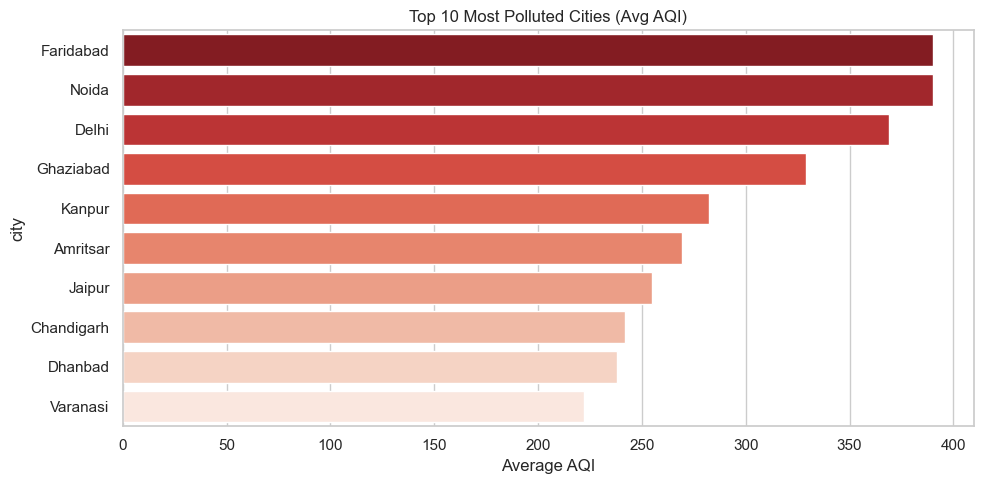

In [27]:
import seaborn as sns

# 2. Load the AQI results (separate from main df)
aqi_df = pd.read_excel("daily_AQI_by_city.xlsx")

# 3. Convert 'date' column to datetime (if not already)
aqi_df['date'] = pd.to_datetime(aqi_df['date'])

# 4. Average AQI per city over 3 months
avg_aqi = aqi_df.groupby("city")["daily_max_AQI"].mean().sort_values(ascending=False)

# Top 10 most polluted cities
top_polluted = avg_aqi.head(10)
print("Top 10 Most Polluted Cities (Highest Average AQI):")
print(top_polluted)

# Plot Top 10 most polluted cities
plt.figure(figsize=(10, 5))
sns.barplot(x=top_polluted.values, y=top_polluted.index, palette="Reds_r")
plt.title("Top 10 Most Polluted Cities (Avg AQI)")
plt.xlabel("Average AQI")
plt.tight_layout()
plt.show()


Top 10 Cleanest Cities (Lowest Average AQI):
city
Port Blair             60.119565
Panaji                 71.783832
Thiruvananthapuram     77.866483
Surat                  87.819055
Aizawl                100.958269
Pune                  108.113192
Kohima                110.060862
Bangalore             113.377602
Imphal                113.384974
Itanagar              116.279526
Name: daily_max_AQI, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_20020\154393045.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clean.sort_values(ascending=False).values,


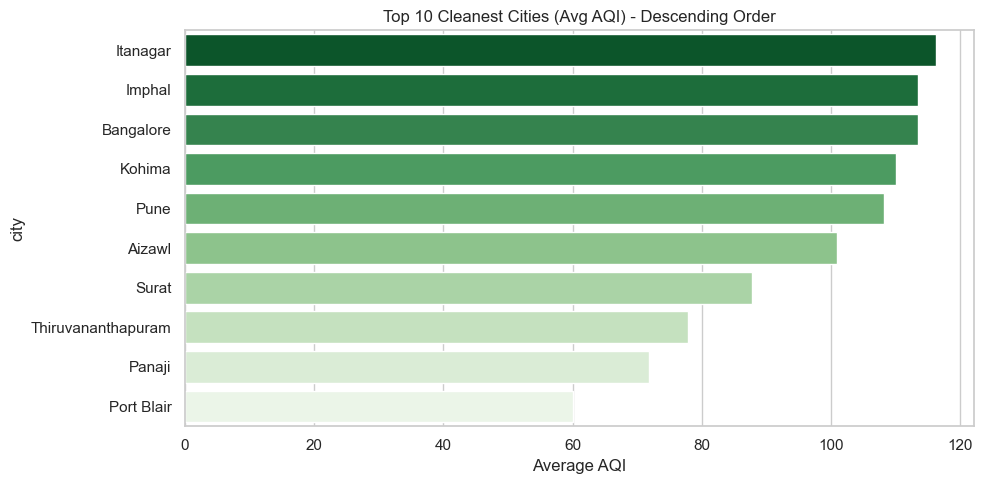

In [31]:
# Top 10 cleanest cities
top_clean = avg_aqi.tail(10).sort_values()
print("\nTop 10 Cleanest Cities (Lowest Average AQI):")
print(top_clean)

# Plot Top 10 Cleanest Cities (Descending Order)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_clean.sort_values(ascending=False).values, 
            y=top_clean.sort_values(ascending=False).index, 
            palette="Greens_r")
plt.title("Top 10 Cleanest Cities (Avg AQI) - Descending Order")
plt.xlabel("Average AQI")
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_20020\1290581131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=aqi_df, x="day_type", y="daily_max_AQI", palette="pastel")


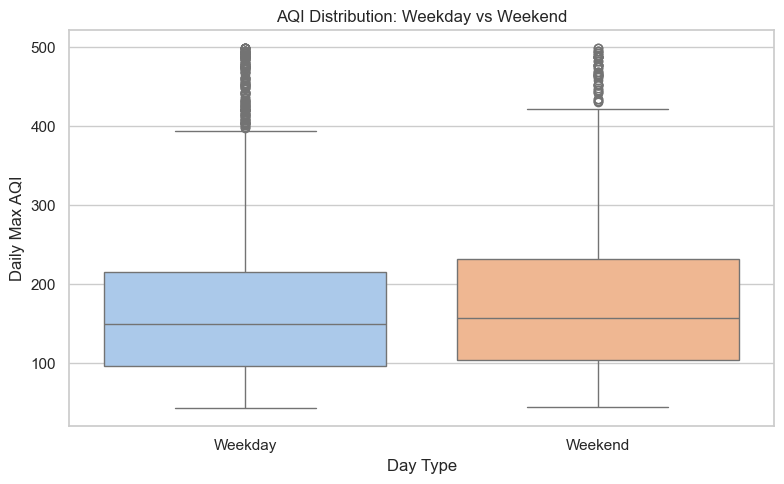

🔍 Mean AQI by Day Type:
 day_type
Weekday    173.932009
Weekend    181.440378
Name: daily_max_AQI, dtype: float64


In [32]:
# Classify into 'Weekday' vs 'Weekend'
aqi_df["day_type"] = aqi_df["date"].dt.dayofweek.apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Boxplot Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=aqi_df, x="day_type", y="daily_max_AQI", palette="pastel")
plt.title("AQI Distribution: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Daily Max AQI")
plt.tight_layout()
plt.show()

# Optional: Mean AQI comparison
mean_aqi = aqi_df.groupby("day_type")["daily_max_AQI"].mean()
print("🔍 Mean AQI by Day Type:\n", mean_aqi)


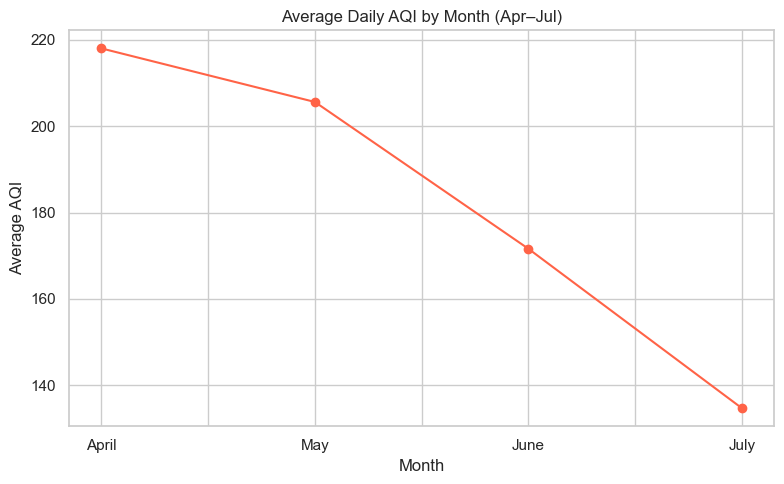

In [42]:
monthly_avg = result.copy()
monthly_avg['month'] = pd.to_datetime(monthly_avg['date']).dt.month_name()
monthly_avg = monthly_avg.groupby('month')['daily_max_AQI'].mean().reindex(['April', 'May', 'June', 'July'])

monthly_avg.plot(kind='line', marker='o', figsize=(8, 5), color='tomato')
plt.title("Average Daily AQI by Month (Apr–Jul)")
plt.ylabel("Average AQI")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_20020\1018912770.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=monthly_city, x='month', y='daily_max_AQI', hue='city', order=ordered_months, ci=None)


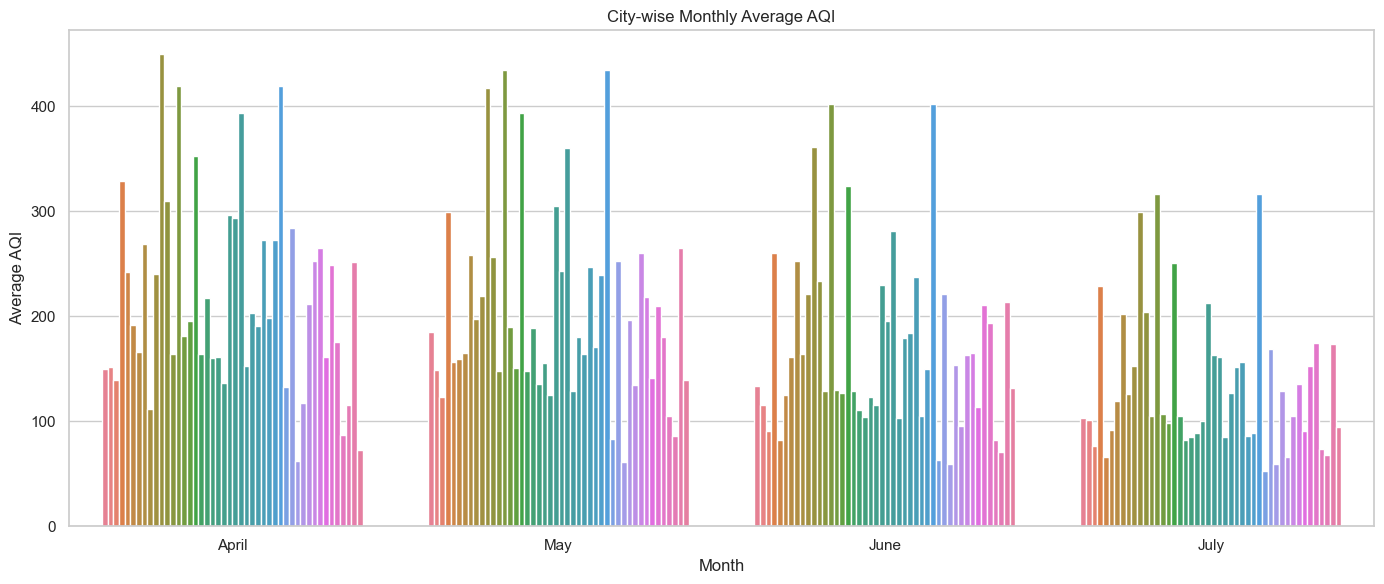

In [43]:
monthly_city = result.copy()
monthly_city['month'] = pd.to_datetime(monthly_city['date']).dt.month_name()
monthly_city = monthly_city.groupby(['city', 'month'])['daily_max_AQI'].mean().reset_index()
ordered_months = ['April', 'May', 'June', 'July']

plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_city, x='month', y='daily_max_AQI', hue='city', order=ordered_months, ci=None)
plt.title("City-wise Monthly Average AQI")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.legend([],[], frameon=False)  # hide legend if too crowded
plt.tight_layout()
plt.show()


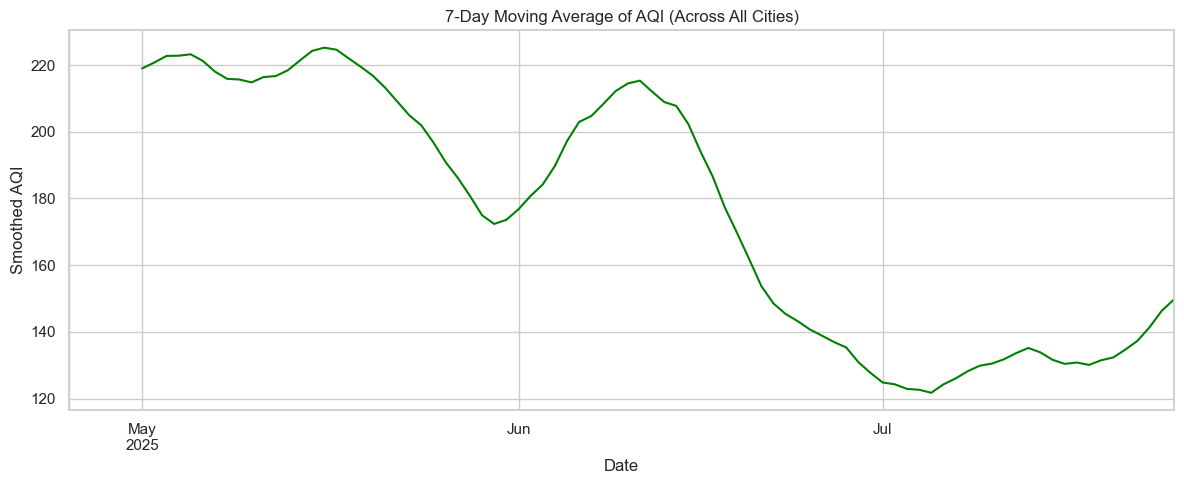

In [46]:
result['date'] = pd.to_datetime(result['date'])
rolling_aqi = result.groupby('date')['daily_max_AQI'].mean().rolling(window=7).mean()

plt.figure(figsize=(12,5))
rolling_aqi.plot(color='green')
plt.title("7-Day Moving Average of AQI (Across All Cities)")
plt.xlabel("Date")
plt.ylabel("Smoothed AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


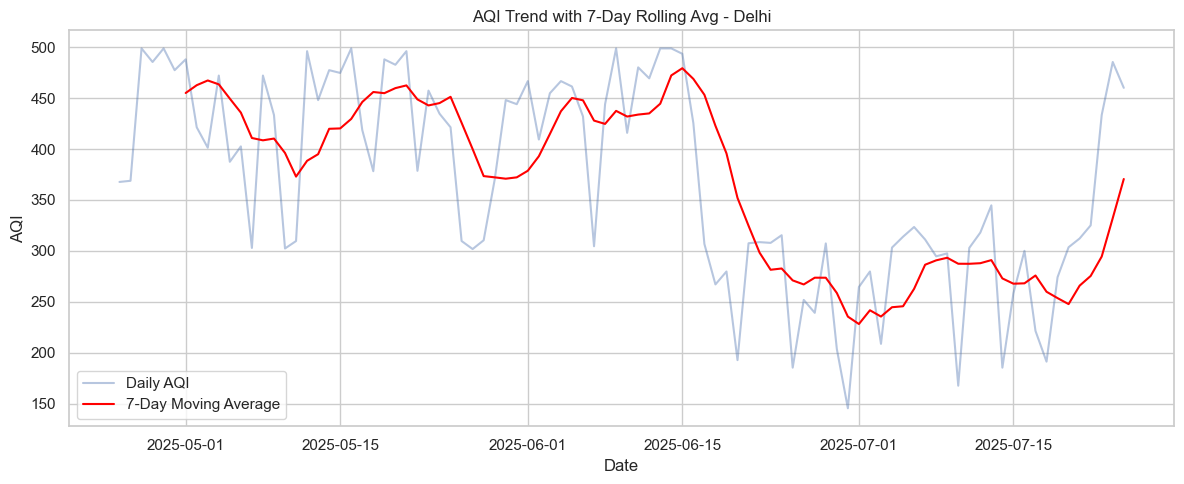

In [34]:
# Choose a city (e.g., Delhi)
city = "Delhi"
city_df = aqi_df[aqi_df["city"] == city].copy()

# Sort by date and apply rolling mean
city_df = city_df.sort_values("date")
city_df["AQI_7day_MA"] = city_df["daily_max_AQI"].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(city_df["date"], city_df["daily_max_AQI"], label="Daily AQI", alpha=0.4)
plt.plot(city_df["date"], city_df["AQI_7day_MA"], label="7-Day Moving Average", color="red")
plt.title(f"AQI Trend with 7-Day Rolling Avg - {city}")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# Modified function to return both AQI and its top pollutant
def compute_hourly_aqi_with_villain(row):
    sub_indices = {}
    for pol in ['pm2_5', 'pm10', 'ozone', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide']:
        value = row[pol]
        if pol == 'carbon_monoxide':
            value = value / 1000  # µg/m³ to mg/m³
        sub_index = calculate_sub_index(value, pol)
        if sub_index is not None:
            sub_indices[pol] = sub_index
    if not sub_indices:
        return pd.Series([None, None])
    max_pollutant = max(sub_indices, key=sub_indices.get)
    return pd.Series([max(sub_indices.values()), max_pollutant])

# Apply the modified function
df[['AQI', 'top_pollutant']] = df.apply(compute_hourly_aqi_with_villain, axis=1)

# Create daily max AQI + villain per city
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date

# Get daily max AQI and associated villain pollutant
daily_aqi_with_villain = df.loc[df.groupby(['city', 'date'])['AQI'].idxmax()][['city', 'date', 'AQI', 'top_pollutant']]
daily_aqi_with_villain.rename(columns={'AQI': 'daily_max_AQI'}, inplace=True)

# Determine most common villain per city over 3 months
villain_summary = daily_aqi_with_villain.groupby('city')['top_pollutant'].agg(lambda x: x.value_counts().idxmax()).reset_index()
villain_summary.columns = ['City', 'Most Frequent Top Pollutant']




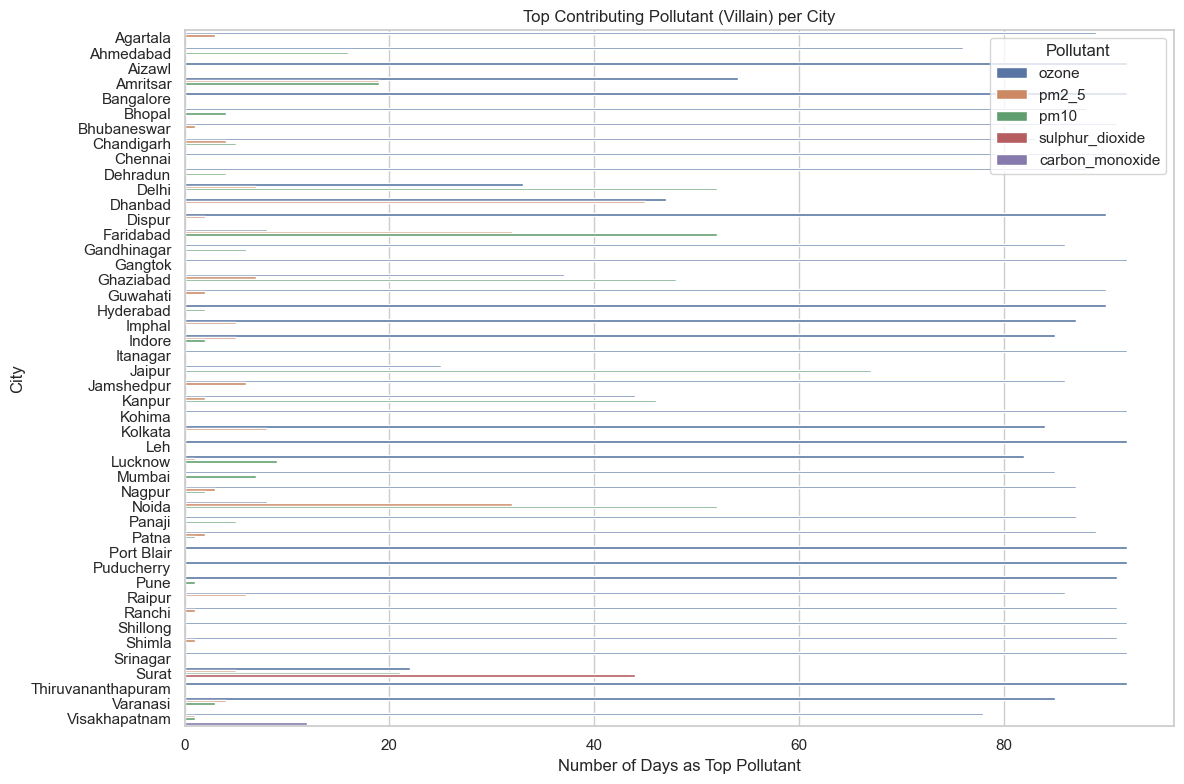

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(data=daily_aqi_with_villain, y="city", hue="top_pollutant", order=daily_aqi_with_villain['city'].value_counts().index)
plt.title("Top Contributing Pollutant (Villain) per City")
plt.xlabel("Number of Days as Top Pollutant")
plt.ylabel("City")
plt.legend(title="Pollutant")
plt.tight_layout()
plt.show()

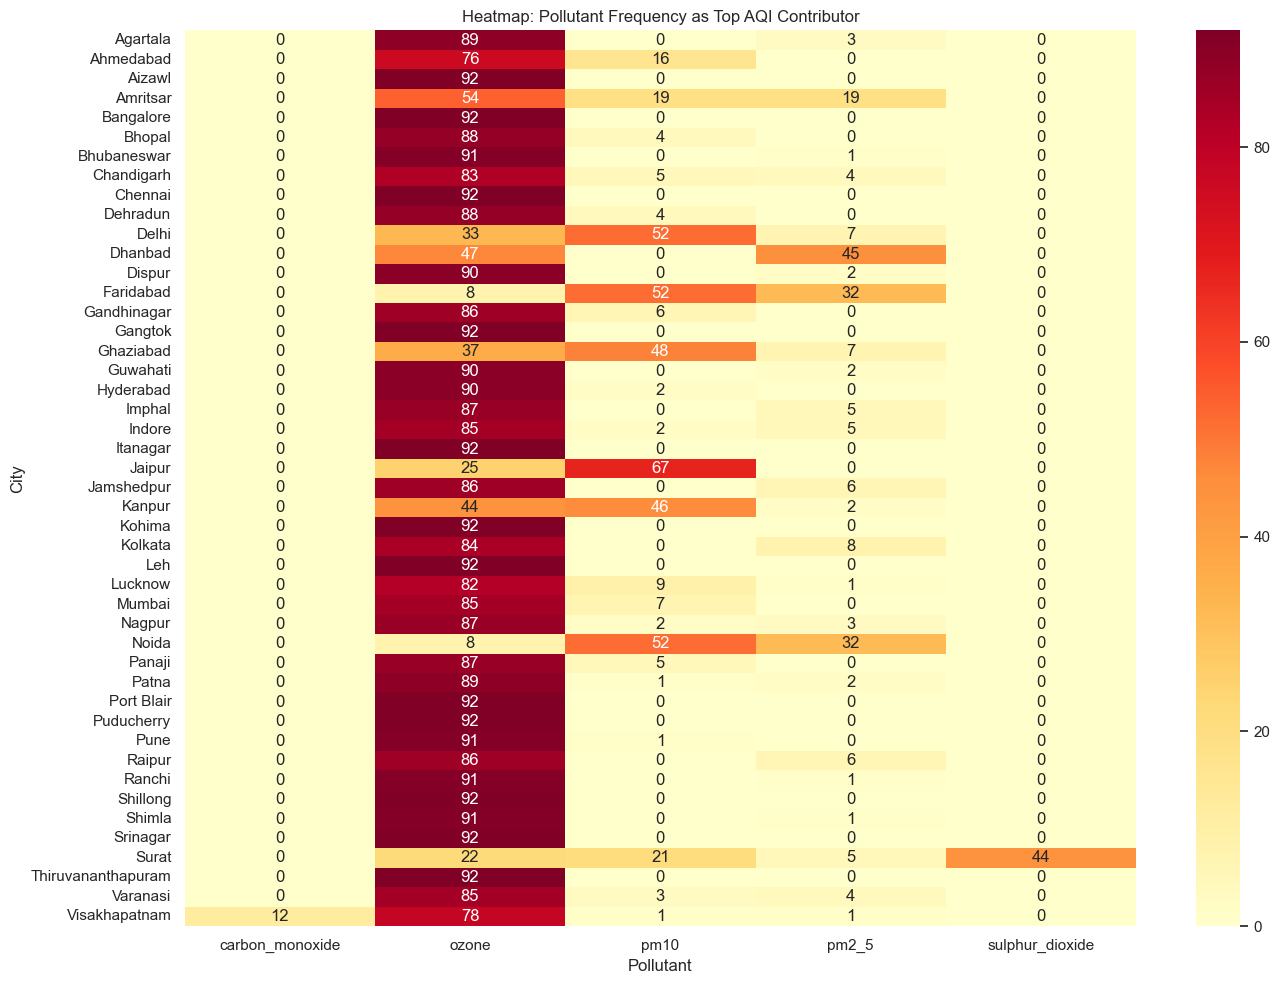

In [38]:
villain_counts = daily_aqi_with_villain.groupby(['city', 'top_pollutant']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(villain_counts, cmap="YlOrRd", annot=True, fmt='d')
plt.title("Heatmap: Pollutant Frequency as Top AQI Contributor")
plt.xlabel("Pollutant")
plt.ylabel("City")
plt.tight_layout()
plt.show()


In [40]:
!pip install tabulate
from tabulate import tabulate
print(tabulate(villain_summary.values.tolist(), headers=["City", "Most Frequent Top Pollutant"], tablefmt="github"))


| City               | Most Frequent Top Pollutant   |
|--------------------|-------------------------------|
| Agartala           | ozone                         |
| Ahmedabad          | ozone                         |
| Aizawl             | ozone                         |
| Amritsar           | ozone                         |
| Bangalore          | ozone                         |
| Bhopal             | ozone                         |
| Bhubaneswar        | ozone                         |
| Chandigarh         | ozone                         |
| Chennai            | ozone                         |
| Dehradun           | ozone                         |
| Delhi              | pm10                          |
| Dhanbad            | ozone                         |
| Dispur             | ozone                         |
| Faridabad          | pm10                          |
| Gandhinagar        | ozone                         |
| Gangtok            | ozone                         |
| Ghaziaba


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


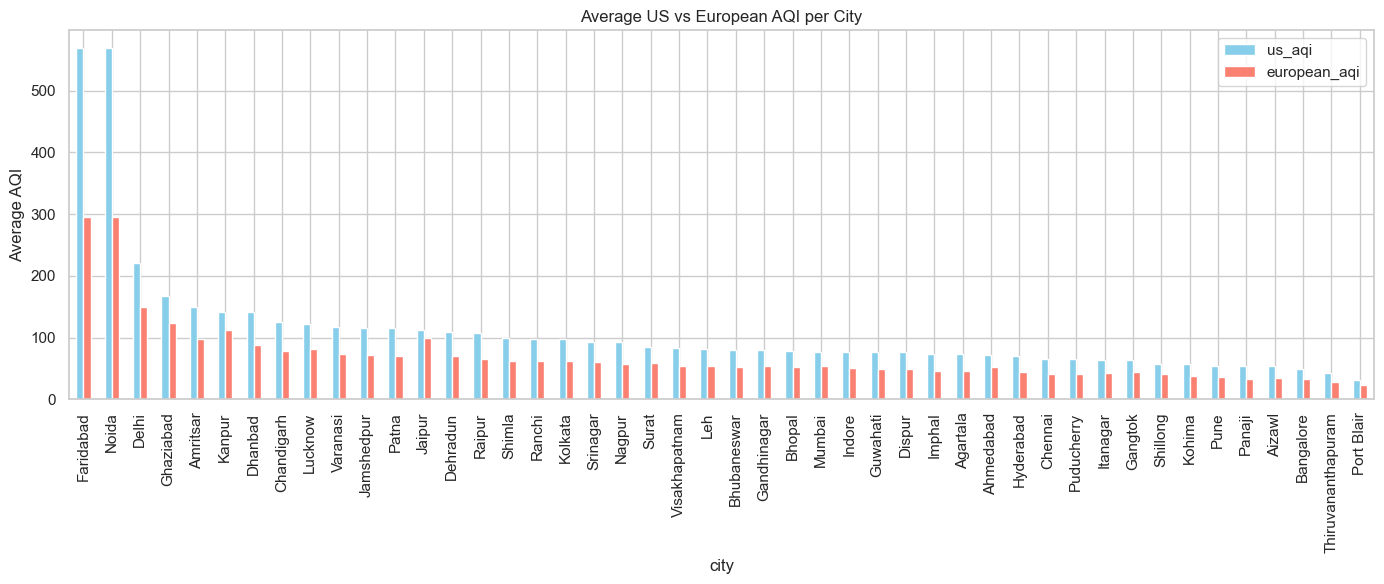

In [52]:


# 📊 By city - average AQI per city
avg_aqi = df.groupby('city')[['us_aqi', 'european_aqi']].mean().sort_values(by='us_aqi', ascending=False)

avg_aqi.plot(kind='bar', figsize=(14, 6), color=['skyblue', 'salmon'])
plt.title("Average US vs European AQI per City")
plt.ylabel("Average AQI")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [13]:
def categorize_aqi_us(value):
    if value <= 50:
        return 'Good'
    elif value <= 100:
        return 'Moderate'
    elif value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif value <= 200:
        return 'Unhealthy'
    elif value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['us_aqi_category'] = df['us_aqi'].apply(categorize_aqi_us)


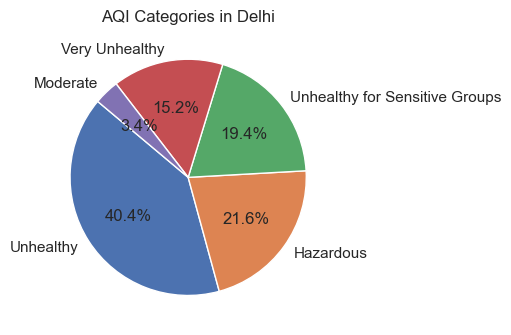

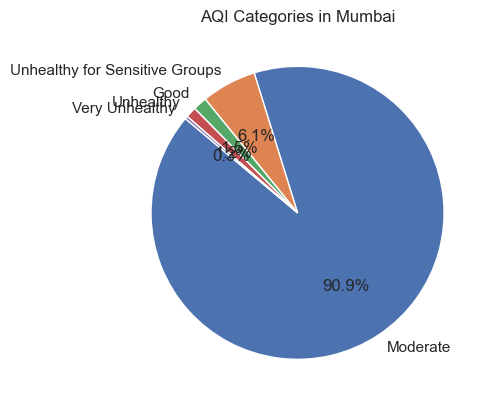

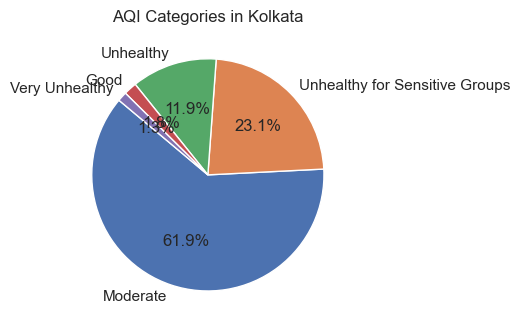

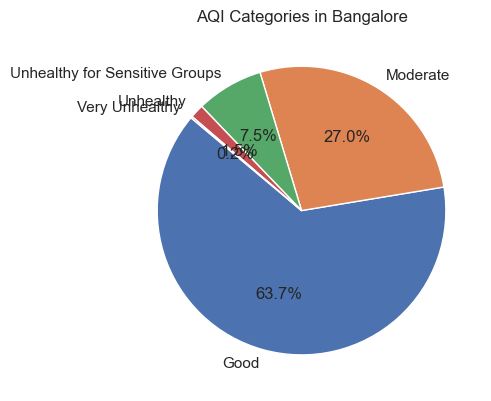

In [14]:
top_cities = ['Delhi', 'Mumbai', 'Kolkata', 'Bangalore']

for city in top_cities:
    plt.figure(figsize=(5, 5))
    category_counts = df[df['city'] == city]['us_aqi_category'].value_counts()
    category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f"AQI Categories in {city}")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()


In [59]:
# Compute average Indian AQI per city
top_polluted_cities = (
    result.groupby('city')['daily_max_AQI']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
    .tolist()
)

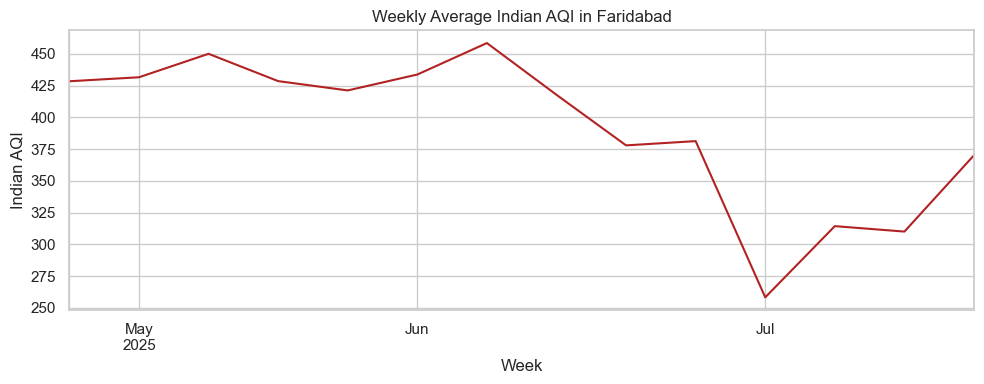

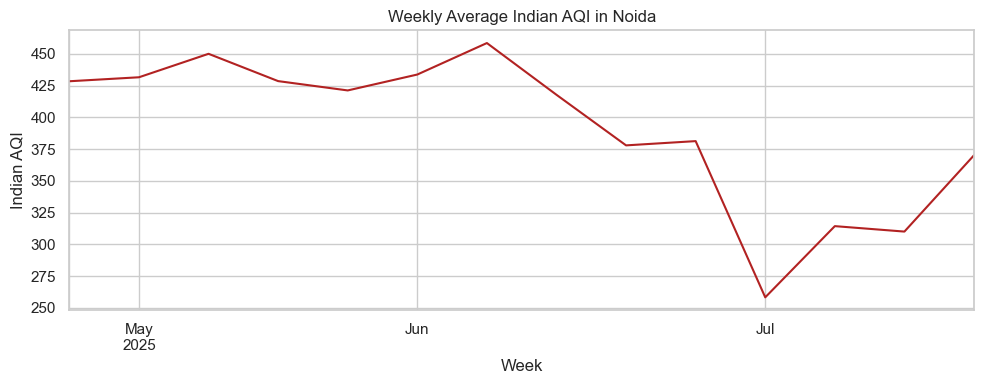

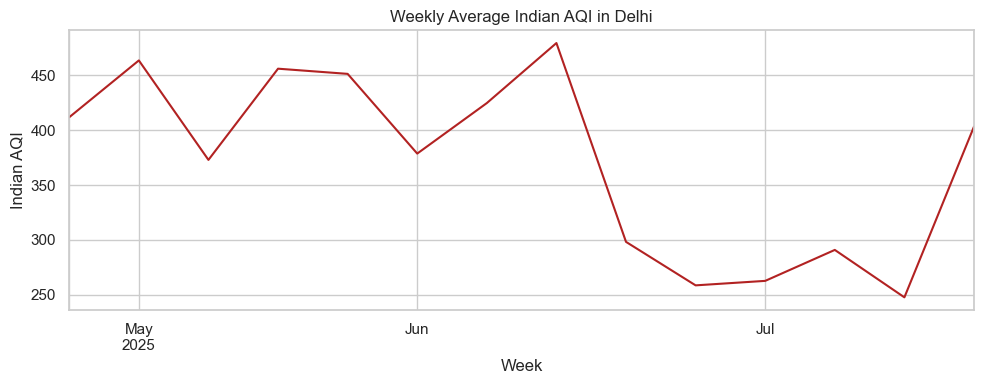

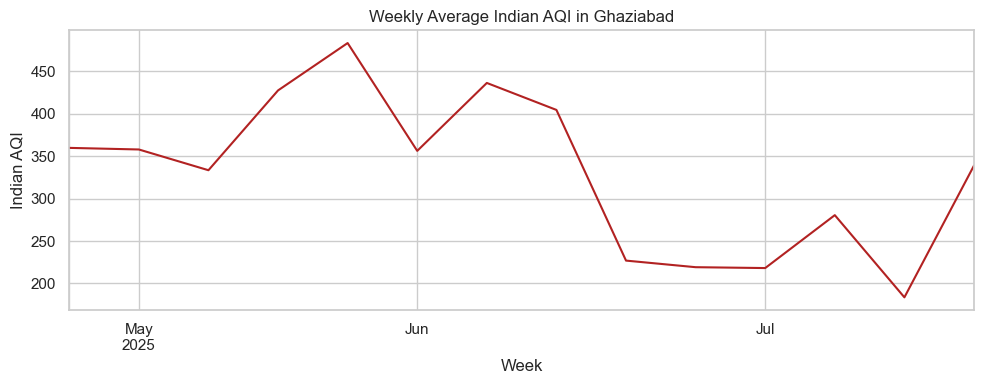

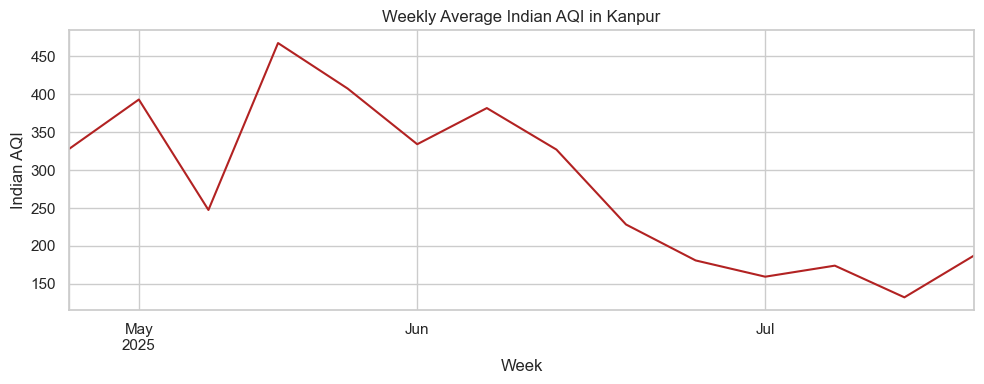

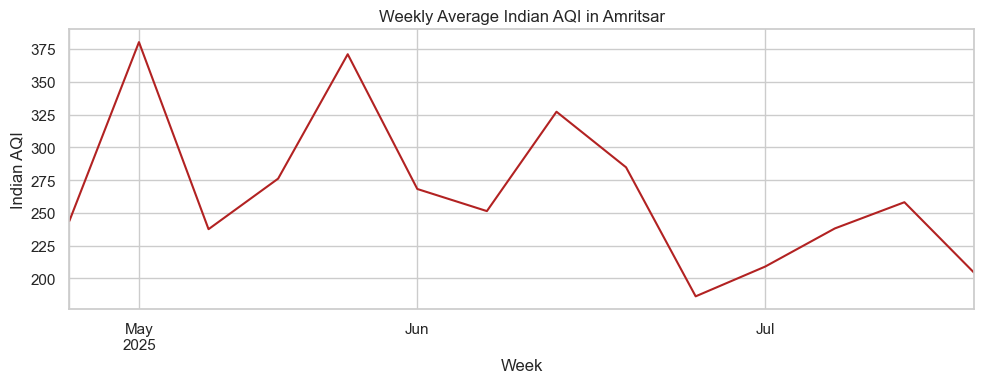

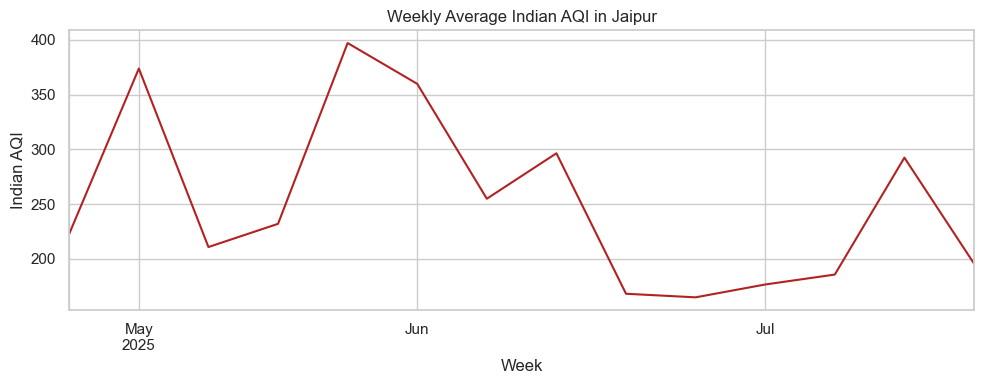

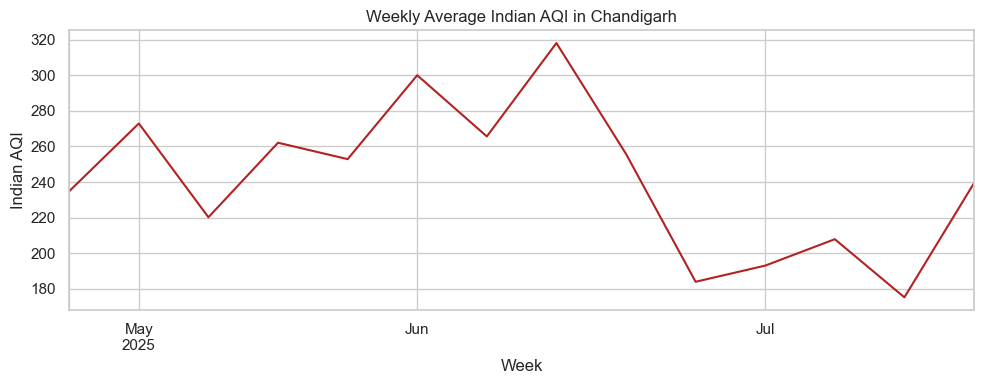

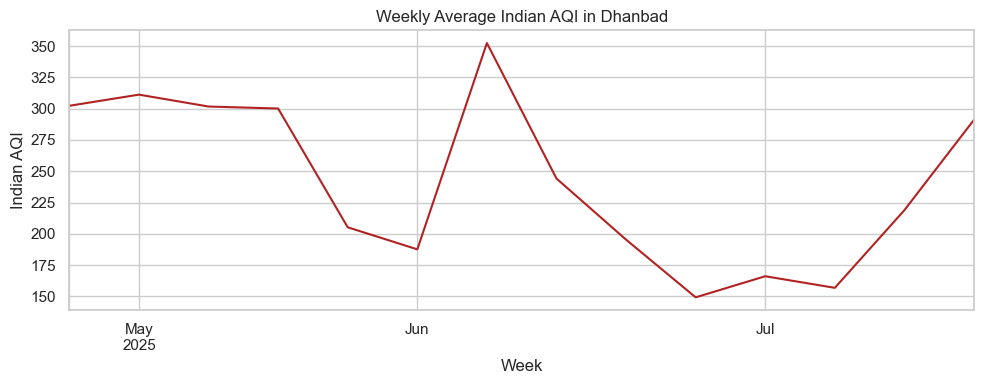

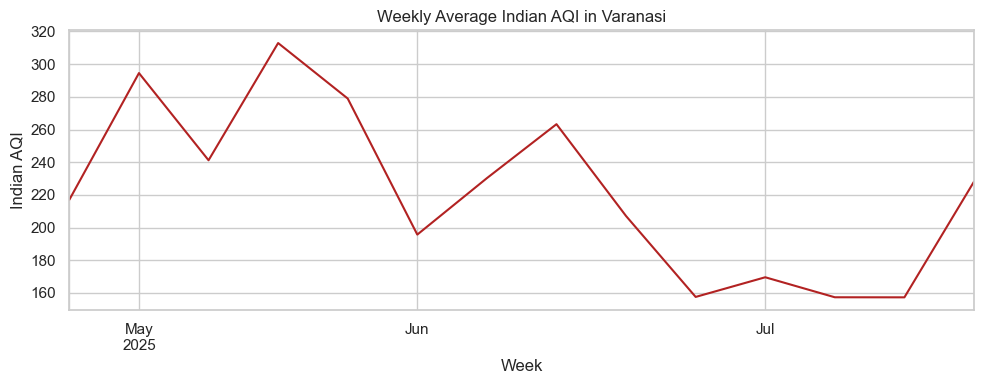

In [60]:
for city in top_polluted_cities:
    city_df = result[result['city'] == city]
    weekly_avg = city_df['daily_max_AQI'].resample('W').mean()

    plt.figure(figsize=(10, 4))
    weekly_avg.plot(label=city, color='firebrick')
    plt.title(f'Weekly Average Indian AQI in {city}')
    plt.ylabel('Indian AQI')
    plt.xlabel('Week')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


#### 📊 AQI Analysis Across Indian Cities (April 25 – July 25)

##### 🟥 Heavily Polluted Regions
The top 10 most polluted cities, led by **Faridabad, Noida, and Delhi**, consistently exhibit extremely poor air quality, with average AQI values nearing or exceeding 390. These levels fall into the “Very Poor” to “Severe” category, which can cause respiratory issues even among healthy individuals and significantly impact vulnerable populations.
- Delhi-NCR cities dominate the list, indicating a persistent regional pollution issue tied to vehicular emissions, construction dust, and industrial activity.
- **PM10** is the dominant pollutant in most of these cities, suggesting coarse particulate matter from dust and combustion sources is a major contributor.

##### 🟩 Clean Air Zones
In contrast, the top 10 cleanest cities — such as **Port Blair, Panaji, and Thiruvananthapuram** — maintain substantially lower AQI levels, mostly under 120. These regions benefit from:
- Lower population densities,
- Coastal breezes or hilly terrain aiding pollutant dispersion,
- Limited industrialization.
These cities fall under the “Good” to “Satisfactory” categories, posing minimal health risks.

##### 🔬 Pollutant Type Insights
An overwhelming number of cities across India list ozone (O₃) as the most frequent top pollutant, especially in cleaner and moderately polluted zones. This suggests:
- A photochemical smog problem in some cities, where sunlight interacts with vehicle emissions and VOCs.
- In cities like Delhi, Noida, Ghaziabad, and Jaipur, PM10 dominates, reinforcing the impact of construction dust, vehicular emissions, and industrial waste.

Interestingly, **Surat** stands out with sulphur dioxide as the primary pollutant, indicating possible industrial emissions from chemical or thermal plants.

##### 🔄 Implications
- There's a **regional disparity in air quality**, with northern industrial cities suffering the most.
- Cities with high PM10 need stricter dust control, waste burning regulation, and vehicular emission control.
- Ozone-dominated cities may require long-term traffic emission management, especially during summer months.
- Clean cities demonstrate what effective urban planning and environmental safeguards can achieve — offering models for other urban centers.
- A clear pattern emerges: the **villains vary** — dust (PM10) in the north, photochemical ozone in the south and northeast, and SO₂ in industrial belts.

###  4. Weather-Environment Correlation

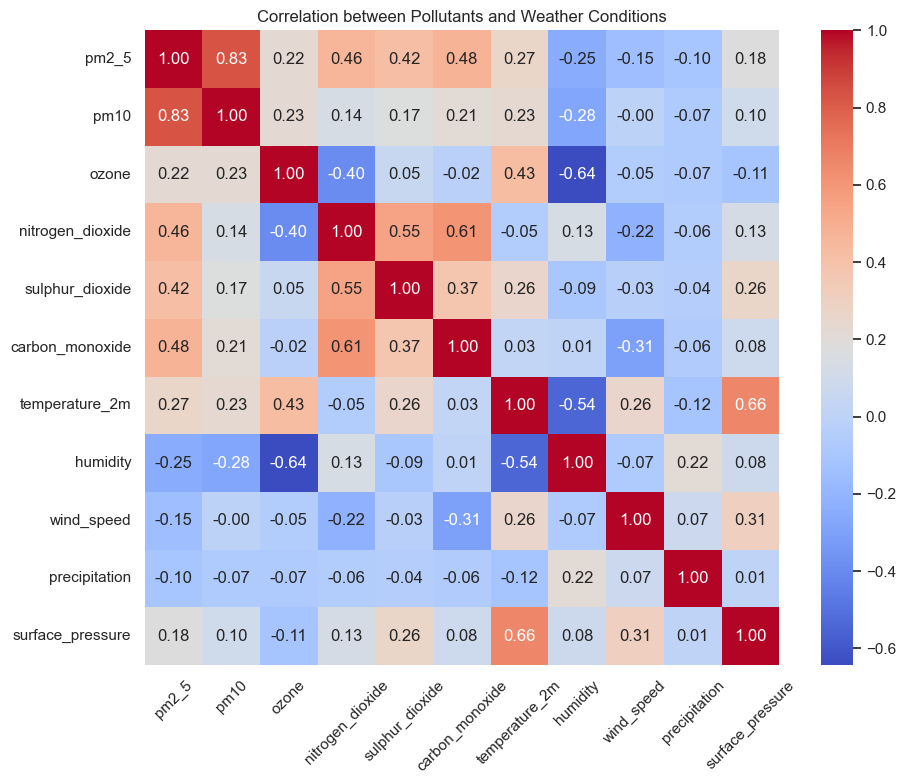

In [16]:
# Select relevant columns
pollutant_weather_cols = [
    'pm2_5', 'pm10', 'ozone', 'nitrogen_dioxide',
    'sulphur_dioxide', 'carbon_monoxide',
    'temperature_2m', 'humidity', 'wind_speed',
    'precipitation', 'surface_pressure'
]

# Compute correlation matrix
corr_matrix = df[pollutant_weather_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation between Pollutants and Weather Conditions")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### 🔥 Pollutants vs Pollutants

- **PM2.5 and PM10**: Strong positive correlation (**0.83**) → Often rise and fall together, as both are particulate matter.
- **PM2.5 vs CO (Carbon Monoxide)**: Moderate positive correlation (**0.48**) → Possibly common sources like vehicle emissions.
- **NO₂ vs CO**: Strong correlation (**0.61**) → Indicates traffic and combustion as shared sources.

##### ☀️ Pollutants vs Weather

- **Ozone vs Temperature**: Moderate positive correlation (**0.43**) → Ozone forms more in higher temperatures (photochemical reaction).
- **Ozone vs Humidity**: Strong negative correlation (**-0.64**) → High humidity can reduce ozone levels.
- **PM2.5 and Humidity**: Weak negative correlation (**-0.25**) → Moist air might reduce dust and PM suspension.
- **PM10 and Wind Speed**: Weak negative correlation (**-0.00**) → Wind doesn’t much affect coarse particles in this case.
- **CO and Wind Speed**: Negative correlation (**-0.31**) → Wind disperses CO away.

##### 🌧️ Weather vs Weather

- **Temperature vs Surface Pressure**: Strong positive correlation (**0.66**) → Warmer air can increase surface pressure under certain conditions.
- **Temperature vs Humidity**: Negative (**-0.54**) → Warmer air tends to hold more water vapor, but actual relative humidity drops unless more moisture is added.

##### 🔎 Takeaways

- **Vehicle emissions** (PM, NO₂, CO) cluster together — tightly correlated.
- **Weather affects pollution**: e.g., heat boosts ozone, wind dilutes CO, humidity cuts ozone.
- This can help model pollution or strategize interventions: *e.g., reduce ozone alerts on hot days*.


##### ✅ Strong Positive Correlations (r ≥ 0.6)
- PM2.5 ↔ PM10 = 0.83
→ Very strong.

- NO₂ ↔ CO = 0.61
→ Suggests combustion-related emissions. Both are useful predictors for air quality index (AQI) or pollution level.

- Temperature ↔ Surface Pressure = 0.66
→ Strong weather relation. in modeling pollutant behavior over seasons or daily fluctuations, this matters.

- Humidity ↔ Ozone = -0.64
→ Strong negative correlation. High humidity → low ozone. Great candidate for predictive models for ozone concentration.

### 5. Geographic Insights

In [65]:
cities = [
    {"name": "Delhi", "lat": 28.6139, "lon": 77.2090},
    {"name": "Mumbai", "lat": 19.0760, "lon": 72.8777},
    {"name": "Bangalore", "lat": 12.9716, "lon": 77.5946},
    {"name": "Chennai", "lat": 13.0827, "lon": 80.2707},
    {"name": "Kolkata", "lat": 22.5726, "lon": 88.3639},
    {"name": "Hyderabad", "lat": 17.3850, "lon": 78.4867},
    {"name": "Ahmedabad", "lat": 23.0225, "lon": 72.5714},
    {"name": "Pune", "lat": 18.5204, "lon": 73.8567},
    {"name": "Nagpur", "lat": 21.1458, "lon": 79.0882},
    {"name": "Jamshedpur", "lat": 22.8046, "lon": 86.2029},
    {"name": "Dhanbad", "lat": 23.7957, "lon": 86.4304},
    {"name": "Lucknow", "lat": 26.8467, "lon": 80.9462},
    {"name": "Jaipur", "lat": 26.9124, "lon": 75.7873},
    {"name": "Patna", "lat": 25.5941, "lon": 85.1376},
    {"name": "Bhopal", "lat": 23.2599, "lon": 77.4126},
    {"name": "Raipur", "lat": 21.2514, "lon": 81.6296},
    {"name": "Bhubaneswar", "lat": 20.2961, "lon": 85.8245},
    {"name": "Thiruvananthapuram", "lat": 8.5241, "lon": 76.9366},
    {"name": "Imphal", "lat": 24.8170, "lon": 93.9368},
    {"name": "Shillong", "lat": 25.5788, "lon": 91.8933},
    {"name": "Aizawl", "lat": 23.7271, "lon": 92.7176},
    {"name": "Kohima", "lat": 25.6701, "lon": 94.1077},
    {"name": "Itanagar", "lat": 27.0844, "lon": 93.6053},
    {"name": "Agartala", "lat": 23.8315, "lon": 91.2868},
    {"name": "Gangtok", "lat": 27.3389, "lon": 88.6065},
    {"name": "Dispur", "lat": 26.1433, "lon": 91.7898},
    {"name": "Panaji", "lat": 15.4909, "lon": 73.8278},
    {"name": "Chandigarh", "lat": 30.7333, "lon": 76.7794},
    {"name": "Shimla", "lat": 31.1048, "lon": 77.1734},
    {"name": "Dehradun", "lat": 30.3165, "lon": 78.0322},
    {"name": "Ranchi", "lat": 23.3441, "lon": 85.3096},
    {"name": "Guwahati", "lat": 26.1445, "lon": 91.7362},
    {"name": "Puducherry", "lat": 11.9416, "lon": 79.8083},
    {"name": "Port Blair", "lat": 11.6234, "lon": 92.7265},
    {"name": "Leh", "lat": 34.1526, "lon": 77.5771},
    {"name": "Srinagar", "lat": 34.0837, "lon": 74.7973},
    {"name": "Amritsar", "lat": 31.6340, "lon": 74.8723},
    {"name": "Gandhinagar", "lat": 23.2156, "lon": 72.6369},
    {"name": "Noida", "lat": 28.5355, "lon": 77.3910},
    {"name": "Faridabad", "lat": 28.4089, "lon": 77.3178},
    {"name": "Ghaziabad", "lat": 28.6692, "lon": 77.4538},
    {"name": "Varanasi", "lat": 25.3176, "lon": 82.9739},
    {"name": "Kanpur", "lat": 26.4499, "lon": 80.3319},
    {"name": "Surat", "lat": 21.1702, "lon": 72.8311},
    {"name": "Visakhapatnam", "lat": 17.6868, "lon": 83.2185},
    {"name": "Indore", "lat": 22.7196, "lon": 75.8577}
]

geo_df = pd.DataFrame(cities)
geo_df.rename(columns={'name': 'city'}, inplace=True)


In [92]:
merged_df = merged_df.rename(columns={'lat': 'latitude', 'lon': 'longitude'})

In [95]:
df = df.merge(merged_df[['city', 'latitude', 'longitude']], on='city', how='left')

In [91]:
merged_df = pd.merge(result, geo_df, on='city', how='left')

In [109]:
print(df.columns)

Index(['city', 'datetime', 'pm10', 'pm2_5', 'ozone', 'nitrogen_dioxide',
       'sulphur_dioxide', 'carbon_monoxide', 'us_aqi', 'european_aqi',
       'temperature_2m', 'humidity', 'wind_speed', 'wind_direction',
       'surface_pressure', 'precipitation', 'hour', 'day', 'month', 'weekday',
       'date', 'AQI', 'Main_Pollutant', 'top_pollutant', 'latitude',
       'longitude', 'lat', 'lon'],
      dtype='object')


In [116]:
# Drop duplicate coordinate columns
df.drop(columns=['lat', 'lon'])

# Save the cleaned DataFrame
df.to_csv('aqi_pollution_geo_merge.csv', index=False)

C:\Users\hp\AppData\Local\Temp\ipykernel_20020\472035902.py:5: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



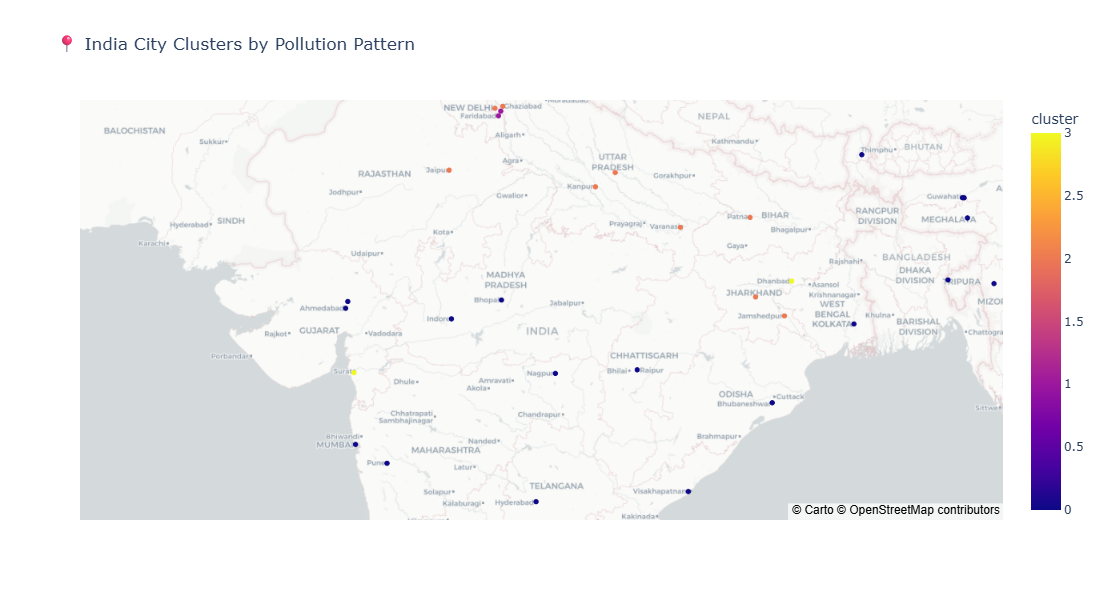

In [106]:
import plotly.express as px
import pandas as pd

# Use your merged features dataframe with lat/lon
fig = px.scatter_mapbox(
    features,
    lat='latitude',
    lon='longitude',
    color='cluster',
    hover_name='city',
    zoom=4.5,
    height=600,
    mapbox_style='carto-positron',  # Use 'open-street-map', 'carto-darkmatter', etc.
    center={"lat": 22.9734, "lon": 78.6569},  # Center over India
    title='📍 India City Clusters by Pollution Pattern'
)
cluster_labels = {
    0: "Low Pollution",
    1: "Moderate Pollution",
    2: "High Pollution",
    3: "Very High Pollution"
}
features['cluster_label'] = features['cluster'].map(cluster_labels) 



fig.write_html("India_City_Clusters_Mapbox.html")
fig.show()


In [71]:
# Sample region map — extend as needed
region_map = {
    'Agartala': 'East',
    'Ahmedabad': 'West',
    'Aizawl': 'East',
    'Amritsar': 'North',
    'Bangalore': 'South',
    'Bhopal': 'Central',
    'Bhubaneswar': 'East',
    'Chandigarh': 'North',
    'Chennai': 'South',
    'Dehradun': 'North',
    'Delhi': 'North',
    'Dhanbad': 'East',
    'Dispur': 'East',
    'Faridabad': 'North',
    'Gandhinagar': 'West',
    'Gangtok': 'East',
    'Ghaziabad': 'North',
    'Guwahati': 'East',
    'Hyderabad': 'South',
    'Imphal': 'East',
    'Indore': 'Central',
    'Itanagar': 'East',
    'Jaipur': 'North',
    'Jamshedpur': 'East',
    'Kanpur': 'North',
    'Kohima': 'East',
    'Kolkata': 'East',
    'Leh': 'North',
    'Lucknow': 'North',
    'Mumbai': 'West',
    'Nagpur': 'Central',
    'Noida': 'North',
    'Panaji': 'West',
    'Patna': 'East',
    'Port Blair': 'South',
    'Puducherry': 'South',
    'Pune': 'West',
    'Raipur': 'Central',
    'Ranchi': 'East',
    'Shillong': 'East',
    'Shimla': 'North',
    'Srinagar': 'North',
    'Surat': 'West',
    'Thiruvananthapuram': 'South',
    'Varanasi': 'North',
    'Visakhapatnam': 'South',
}

result['region'] = result['city'].map(region_map)

C:\Users\hp\AppData\Local\Temp\ipykernel_20020\53794217.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_20020\53794217.py:6: UserWarning:

Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.



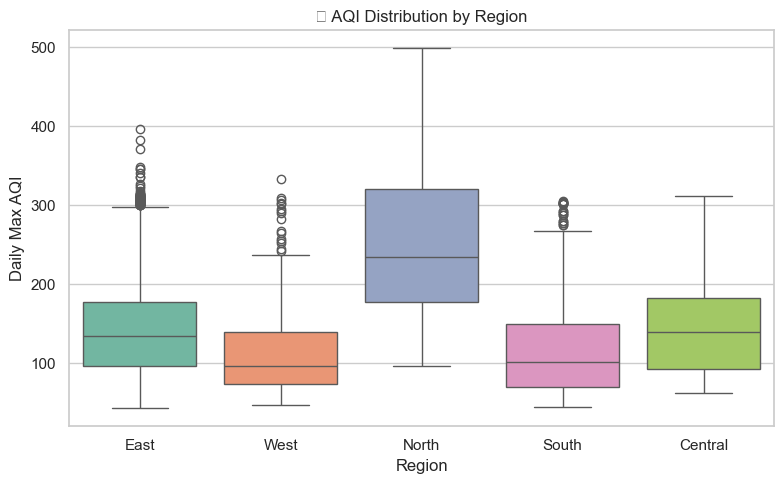

In [82]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=result, x='region', y='daily_max_AQI', palette='Set2')
plt.title('🌐 AQI Distribution by Region')
plt.ylabel('Daily Max AQI')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

In [73]:
region_avg = result.groupby('region')['daily_max_AQI'].mean().sort_values(ascending=False)
print(region_avg)

region
North      265.801024
Central    153.984400
East       151.041719
South      118.272196
West       111.299683
Name: daily_max_AQI, dtype: float64


### 📊 EDA Conclusion: Air Quality in Indian Cities

- Northern India requires urgent intervention due to consistent poor air quality.
- Faridabad, Noida, Delhi, Ghaziabad, Kanpur, Amritsar, Jaipur, Chandigarh, Dhanbad, Varanasi are the most polluted
- Ozone and PM10 are the dominant pollutants across most regions.
- Clustering and geospatial visualization provide a strong basis for targeted regional policy making.
- Clean cities offer insight into sustainable practices and natural conditions that promote better air quality.
- Port Blair, Panaji, Thiruvananthapuram, Surat, Aizawl, Pune, Kohima, Bangalore, Imphal, Itanagar are the most cleanest.
- Pollutant Correlations: Vehicle-related pollutants — PM10, NO₂, CO — were strongly correlated, suggesting a common source (traffic, combustion).
- Weather Influences:
   - ☀️ Temperature → Positively correlated with Ozone (O₃) formation.
   - 🌬️ Wind speed → Diluted CO and other ground-level pollutants.
   - 💧 Humidity → Suppressed Ozone, possibly due to reduced sunlight and photochemical reactions.